# Libraries

In [73]:
# Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

# Statistical Libraries
from scipy.stats import zscore
from scipy import stats

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV


# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

# Oversampling Techniques
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics and Evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay, 
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, 
    roc_curve, precision_recall_curve, auc, average_precision_score
)

# Warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")

# Styling
import matplotlib.style as style
style.use('fivethirtyeight')


In [74]:
df = pd.read_csv('/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv', sep=';')

In [75]:
df.shape

(41188, 21)

In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Data Dictionary

| Input variables:                                         |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
|----------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|---|
| # bank client data:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 1                                                        | age (numeric)                                                                                                                                                                                                                                                                                                                                                                                                                |                                                                |   |
| 2                                                        | job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                                                                                                                                                                                           |                                                                |   |
| 3                                                        | marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                                                                                                                                                                                                  |                                                                |   |
| 4                                                        | education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                                                                                                                                                                                     |                                                                |   |
| 5                                                        | default: has credit in default? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                          |                                                                |   |
| 6                                                        | housing: has housing loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                               |                                                                |   |
| 7                                                        | loan: has personal loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                                 |                                                                |   |
| # related with the last contact of the current campaign: |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 8                                                        | contact: contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 9                                                        | month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                      |                                                                |   |
| 10                                                       | day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')                                                                                                                                                                                                                                                                                                                                       |                                                                |   |
| 11                                                       | duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |                                                                |   |
| # other attributes:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 12                                                       | campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                                                             |                                                                |   |
| 13                                                       | pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                                                                                                                                                                                                                                   |                                                                |   |
| 14                                                       | previous: number of contacts performed before this campaign and for this client (numeric)                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 15                                                       | poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                                                                                                                                                                                        |                                                                |   |
| # social and economic context attributes                 |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 16                                                       | emp.var.rate: employment variation rate                                                                                                                                                                                                                                                                                                                                                                                      | quarterly indicator (numeric)                                  |   |
| 17                                                       | cons.price.idx: consumer price index                                                                                                                                                                                                                                                                                                                                                                                         | monthly indicator (numeric)                                    |   |
| 18                                                       | cons.conf.idx: consumer confidence index                                                                                                                                                                                                                                                                                                                                                                                     | monthly indicator (numeric)                                    |   |
| 19                                                       | euribor3m: euribor 3 month rate                                                                                                                                                                                                                                                                                                                                                                                              | daily indicator (numeric)                                      |   |
| 20                                                       | nr.employed: number of employees                                                                                                                                                                                                                                                                                                                                                                                             | quarterly indicator (numeric)                                  |   |
| Output variable (desired target):                        |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 21                                                       | y                                                                                                                                                                                                                                                                                                                                                                                                                            | has the client subscribed a term deposit? (binary: 'yes','no') |   |

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [79]:
# Check for null values if any

# This method shows the count of null values, percent and dataTypes

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    tt['Types'] = types
    return(np.transpose(tt))

In [80]:
missing_data(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,object,object,object,object,object,object,object,object,object,...,int64,int64,int64,object,float64,float64,float64,float64,float64,object


# How many term depositors are there in the data ?

In [81]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

<Axes: ylabel='count'>

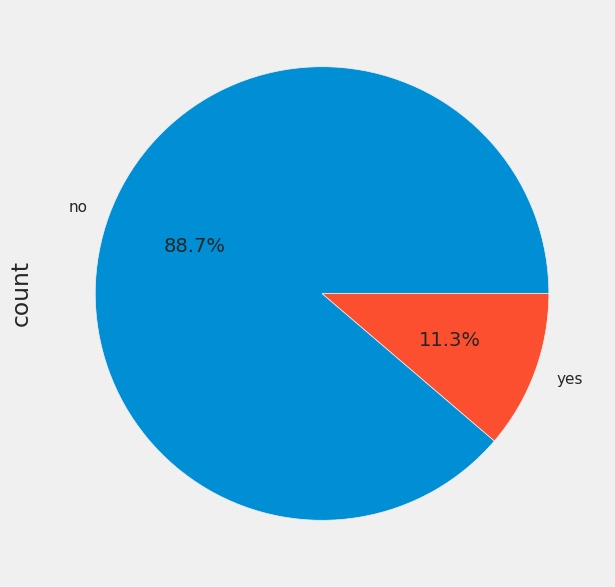

In [82]:
def plot_pie(dataset, target, size=(7,7)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.1f%%', figsize=size)

plot_pie(df, 'y')

# What is the baseline likelihood of term deposits ? This tells us what is the success rate in the absence of ML model

In [83]:
# create a new variable `target` that takes 1 for `yes` else 0
df['target'] = np.where(df['y'].isin(['yes']), 1, 0)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [84]:
df['target'].mean()

0.11265417111780131

### In a no model scenario, out of 100 calls, _11 are taking the term loan_

<Axes: ylabel='count'>

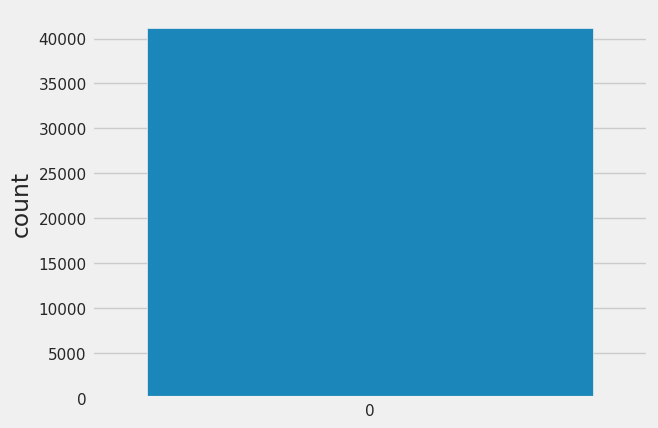

In [85]:
sns.countplot(df['target'])

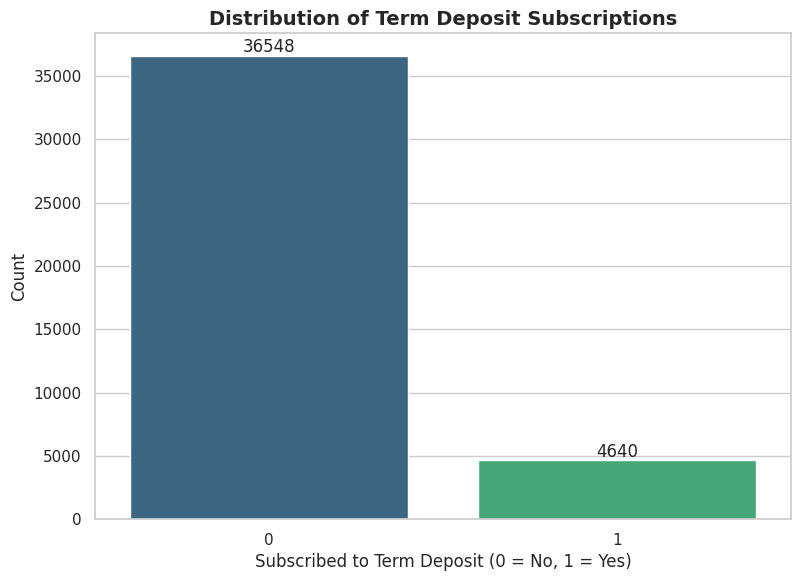

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style for the plot
sns.set(style="whitegrid")

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='target', palette='viridis')

# Add annotations for each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Set meaningful labels and title
ax.set_title('Distribution of Term Deposit Subscriptions', fontsize=14, weight='bold')
ax.set_xlabel('Subscribed to Term Deposit (0 = No, 1 = Yes)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Display the plot
plt.show()


# Inspecting Categorical variables

# 1. education

In [87]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


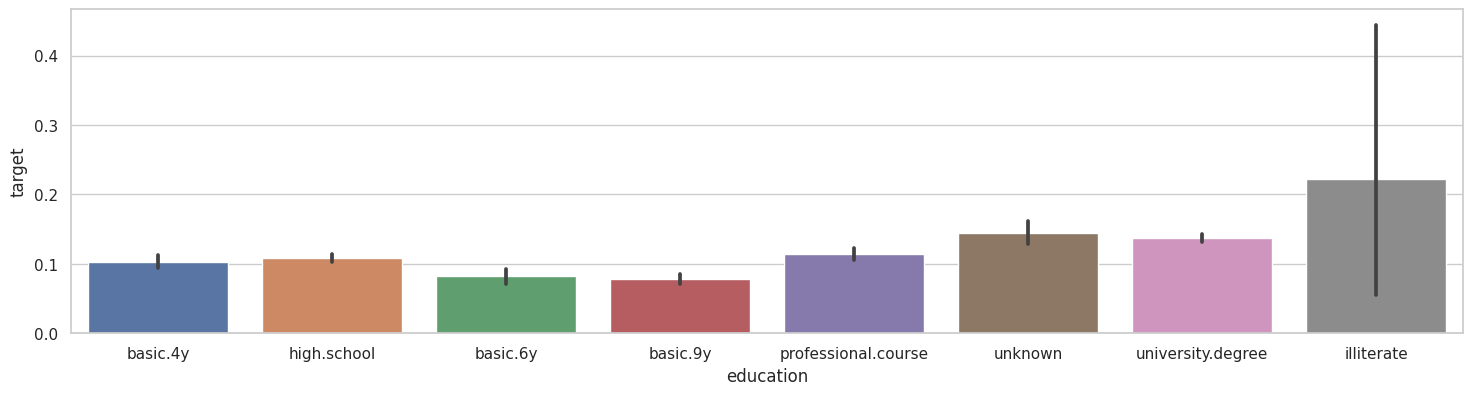

In [88]:
# We will plot the relationship of `education` with `target`
# estimator is mean to show the likelihood of taking up the loan
def barplot_mean(x, y, df, hue=None, order=None, hue_order=None):
    print(df.groupby(x)[y].mean())
    uniqs = df[x].nunique()
    
    if uniqs > 4:
        plt.figure(figsize=(16,4))
        
    sns.barplot(x=x, y=y, data=df, estimator=np.mean, hue=hue, order=order, hue_order=hue_order)
    plt.show()

barplot_mean('education', 'target', df)

### `university.degree` and `professional.course` are a little better than the avg. success rate of the data

### `illiterate` and `unknown` is showing high chances of taking a loan (comparing to 0.112..), but we do not want to target such audience in the practical scenario. Always analyze graphs with practical perspective !

In [89]:
# We will group the basic education groups into one
basic_grps = ['basic.4y', 'basic.6y', 'basic.9y']

df['education'] = np.where(df['education'].isin(basic_grps), 'Basic', df['education'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


education
Basic                  0.087029
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


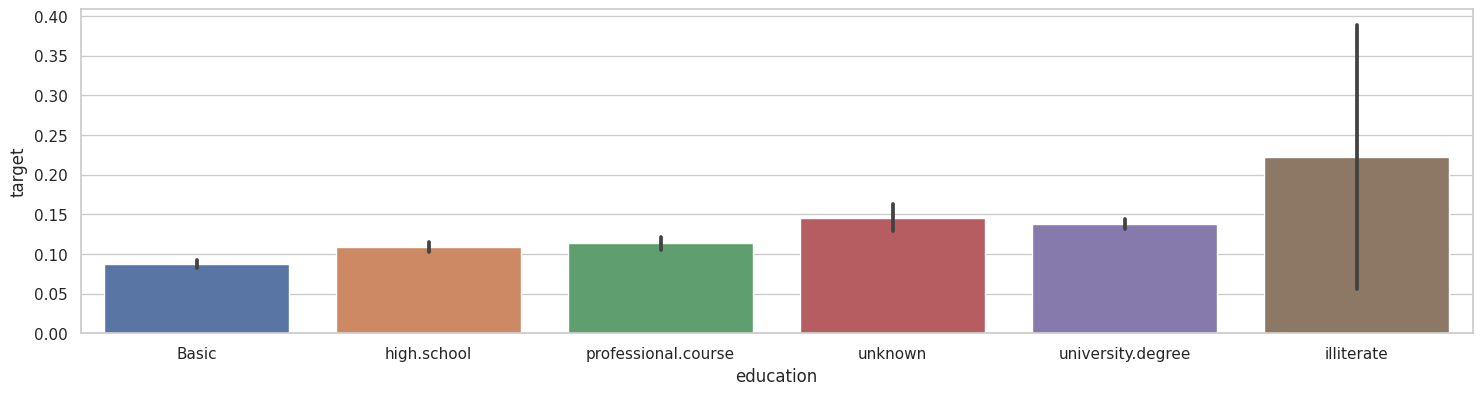

In [90]:
barplot_mean('education', 'target', df)

### we will also go ahead and merge `unknown` and `illiterate` into one

education
Basic                  0.087029
high.school            0.108355
professional.course    0.113485
university.degree      0.137245
unknown                0.145798
Name: target, dtype: float64


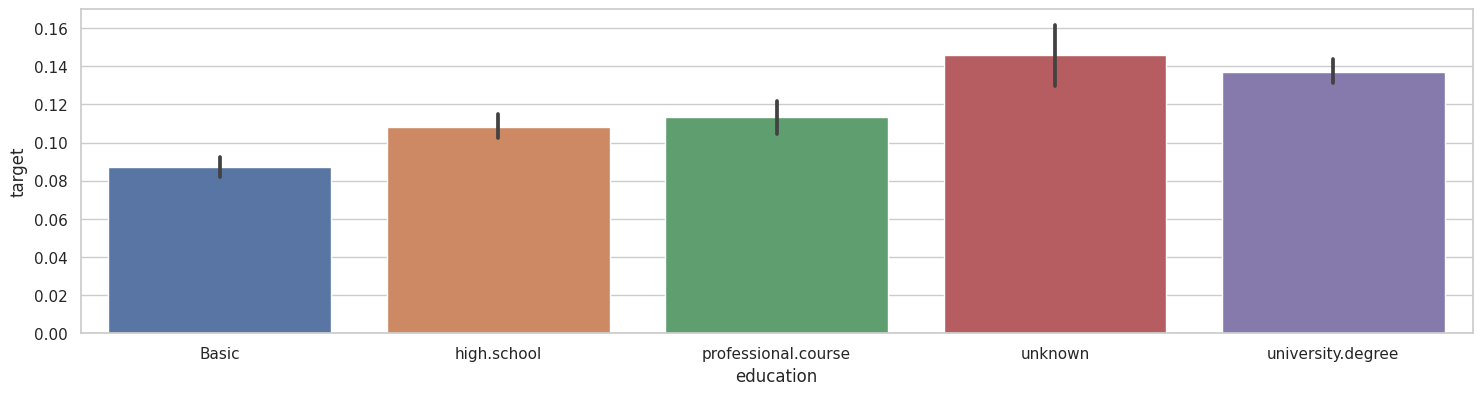

In [91]:
df['education'] = np.where(df['education'].isin(['illiterate']), 'unknown', df['education'])
barplot_mean('education', 'target', df)

### There is no monotonic trend visible that accounts for the discrmination of the target variable. We will be doing similar analysis for other variables as well

# 2. day_of_week

day_of_week
fri    0.108087
mon    0.099483
thu    0.121188
tue    0.117800
wed    0.116671
Name: target, dtype: float64


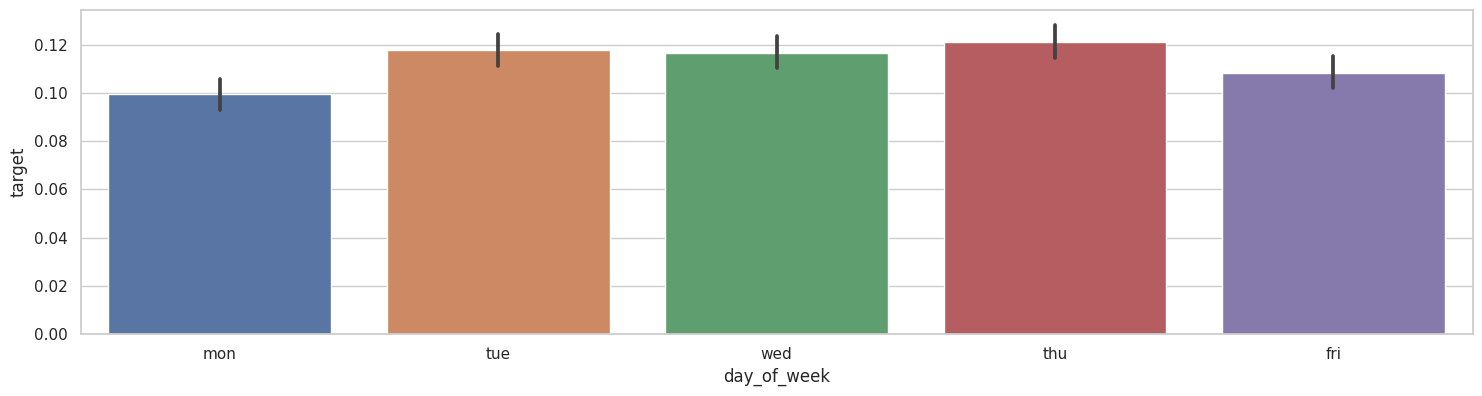

In [92]:
barplot_mean('day_of_week', 'target', df)

### We see there is no significant difference in the trend for different days of the week so we can conclude that this is a weak predictor of the dependent target

# 3. job

In [93]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64


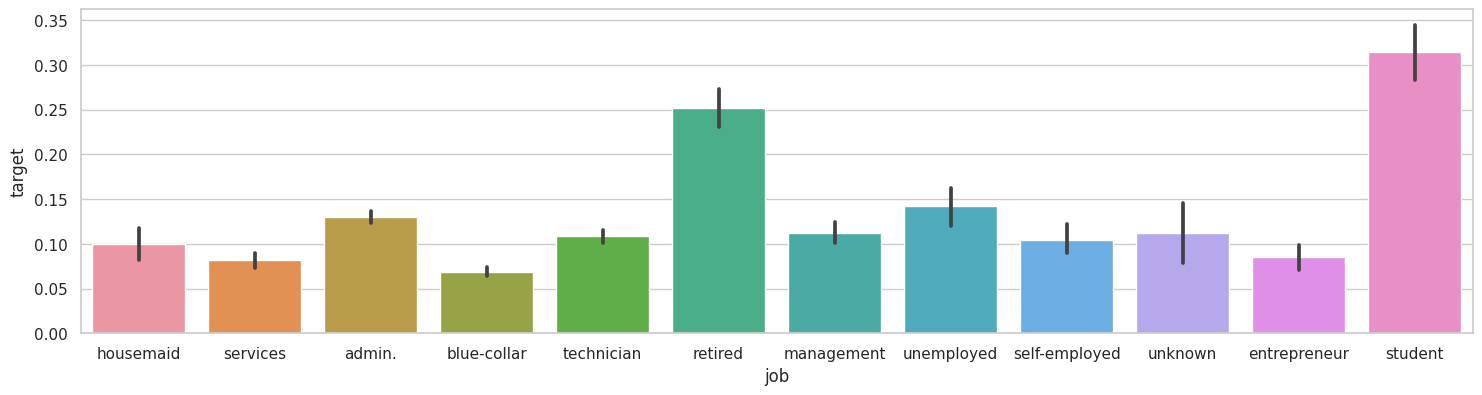

In [94]:
barplot_mean('job', 'target', df)

### It appears as if `student` and `retired` people have very high chances of taking a term loan. We can also go ahead and group `unknown` and `unemployed` into one bucket

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.134673
Name: target, dtype: float64


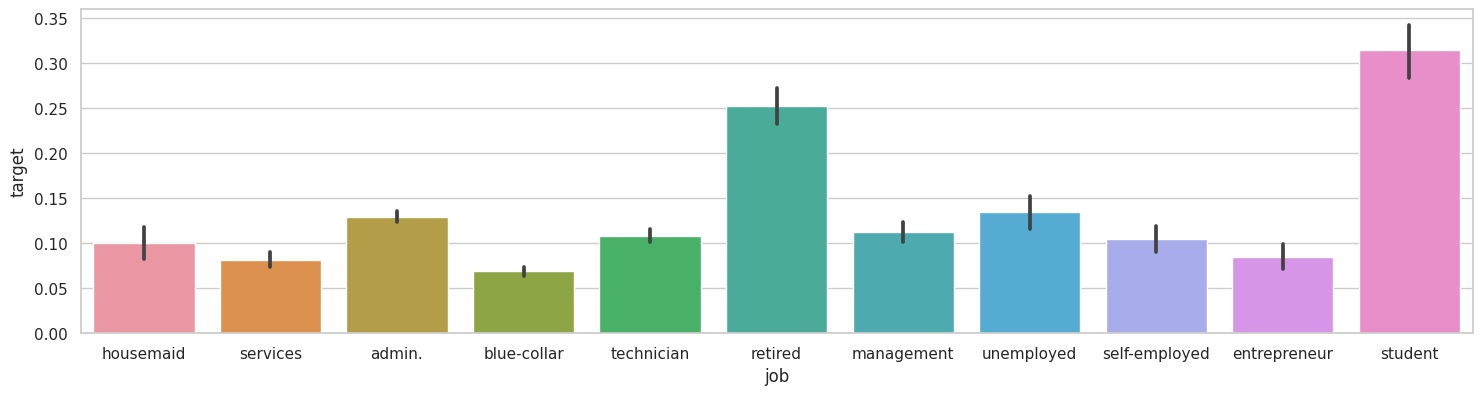

In [95]:
df['job'] = np.where(df['job'].isin(['unknown']), 'unemployed', df['job'])
barplot_mean('job', 'target', df)

# 4.marital_status 

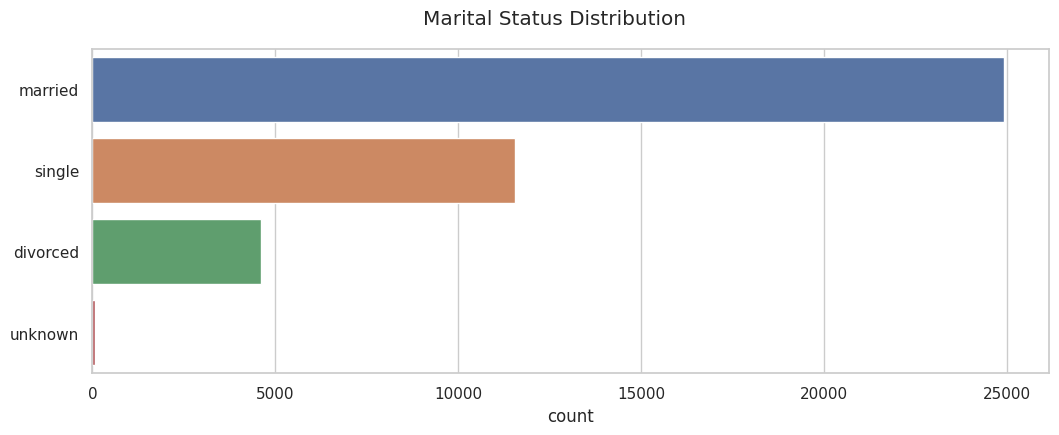

In [96]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['marital'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='marital', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Marital Status Distribution')

plt.show()

marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
Name: target, dtype: float64


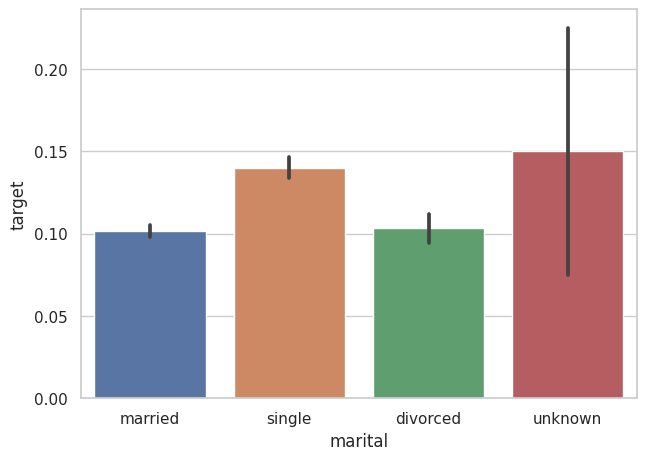

In [97]:
barplot_mean('marital', 'target', df)

### We see there is no significant difference in the trend for different marital status so we can conclude that this is a weak predictor of the dependent target

# 5. default

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: target, dtype: float64


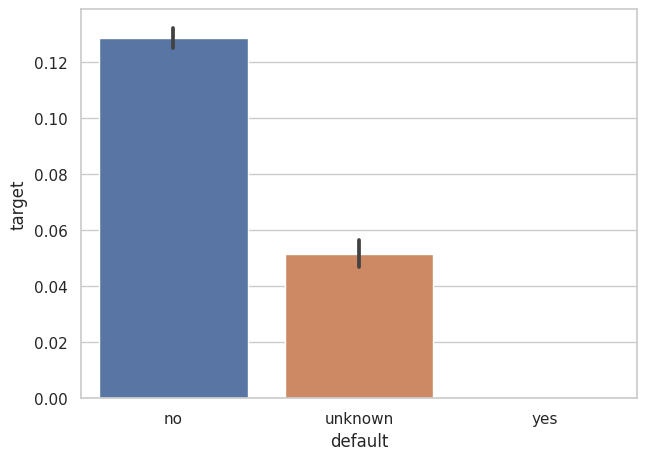

In [98]:
barplot_mean('default', 'target', df)

### We see a trend in case of `default`. A person having `default` is having the mean as `0`. We will inspect this by doing the sum

In [99]:
print(df.groupby('default')['target'].sum())
print("*"*30)
# if we look at the count - we do have 3 cases of people who have `defaulted`
print(df.groupby('default')['target'].count())

# But we do have cases of `unknown`. 
# We can go ahead and group them in `yes` 
# because we are not sure which category they belong to

default
no         4197
unknown     443
yes           0
Name: target, dtype: int64
******************************
default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64


default
no     0.128790
yes    0.051512
Name: target, dtype: float64


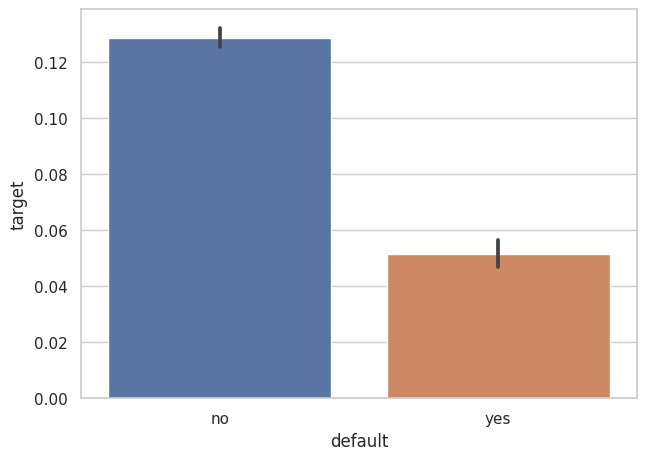

In [100]:
df['default'] = np.where(df['default'].isin(['unknown']), 'yes', df['default'])
barplot_mean('default', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable. 

### Note: As a predictor, this is also weak because the likelihood of a person with `no default` buying a term loan is only `12.87 %` 

# 6. housing

housing
no         0.108796
unknown    0.108081
yes        0.116194
Name: target, dtype: float64


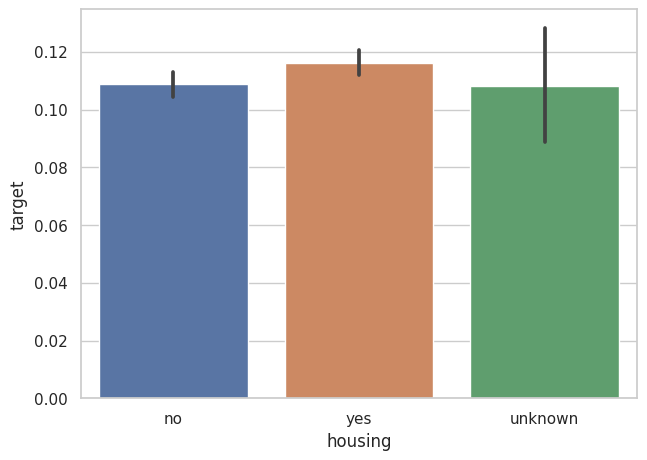

In [101]:
barplot_mean('housing', 'target', df)

### We see there is no significant difference in the trend for different housing loan status so we can conclude that this is a weak predictor of the dependent target

# 7. loan

loan
no         0.113402
unknown    0.108081
yes        0.109315
Name: target, dtype: float64


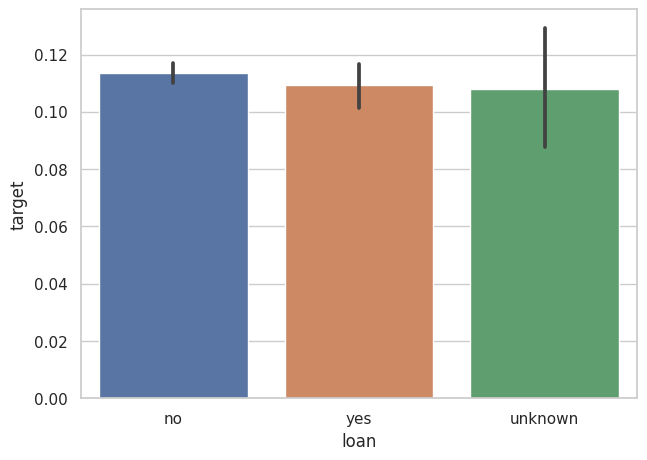

In [102]:
barplot_mean('loan', 'target', df)

### We see there is no significant difference in the trend for different personal loan status so we can conclude that this is a weak predictor of the dependent target

# 8. contact

contact
cellular     0.147376
telephone    0.052313
Name: target, dtype: float64


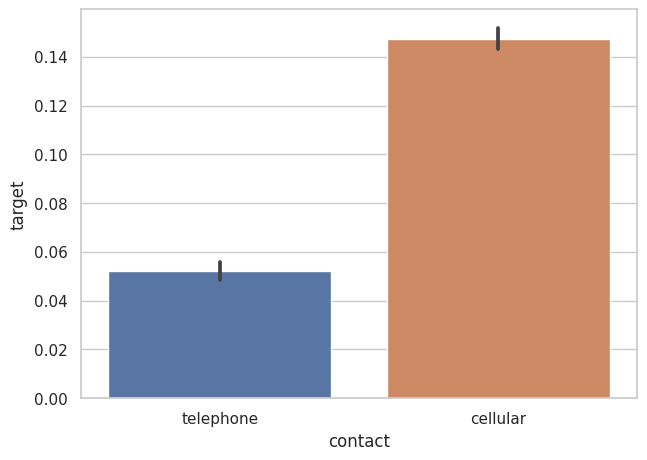

In [103]:
barplot_mean('contact', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

### Note: We see that there is a positive slope in the trend

# 9. month

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: target, dtype: float64


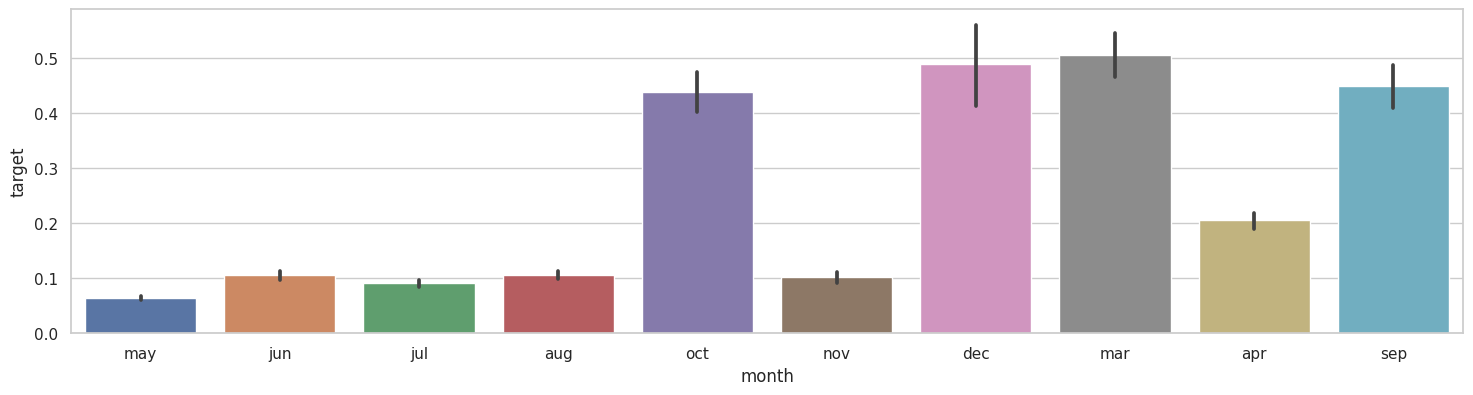

In [104]:
barplot_mean('month', 'target', df)

### We are not able to see any monotonic trend here. One way to resolve this is to see if grouping them into quarters will help us find any signals.

In [105]:
qtr1 = ['jan', 'feb', 'mar']
qtr2 = ['apr', 'may', 'jun']
qtr3 = ['jul', 'aug', 'sep']
qtr4 = ['oct', 'nov', 'dec']

df['qtr'] = np.where(df['month'].isin(qtr1), 'Q1', 
                                       np.where(df['month'].isin(qtr2), 'Q2', 
                                       np.where(df['month'].isin(qtr3), 'Q3',
                                       np.where(df['month'].isin(qtr4), 'Q4', 0)
                                       )))
df['qtr'].value_counts()

qtr
Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: count, dtype: int64

### `Q1` has the least amount of observation while `Q2` is the majority

### We will study the behavior of the target variable with respect to quarter

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


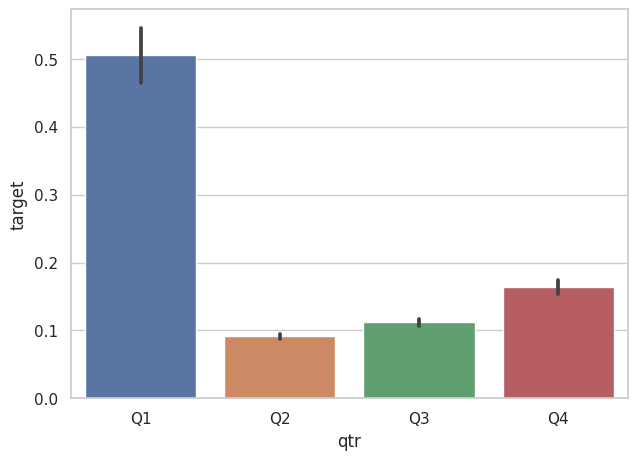

In [106]:
barplot_mean('qtr', 'target', df, order=["Q1","Q2","Q3","Q4"])
# `order` as the name suggest orders the graph in similar fashion as the input list
# here we pass the order as per the quarters

### `Q1` is showing a likelihood of `50 %`. That is huge ! Of all the customers called in the start of the year, every second called customer will end up buying a term loan

### While building our strategy, we can inform the marketing team to invest their major efforts in the beginning of the year to get the best results.

### Arriving into `Q2`, there is a sharp decline in the interest of the customers. These may be the dry months for the marketing team. This can also support us building an effective strategy accordingly.

## Let us try combining `qtr` and other variable together.

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


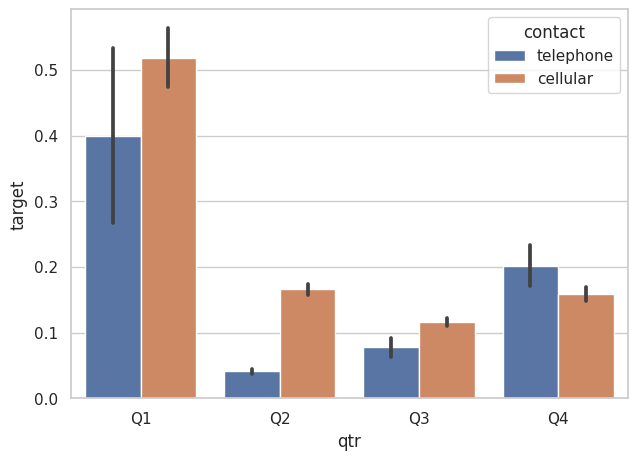

In [107]:
barplot_mean('qtr', 'target', df, hue='contact', order=["Q1","Q2","Q3","Q4"])

### We have an interesting insight here ! `Q2` has a likelihood of `0.9%` but if you target the customers with `contact="cellular"`, your chances are very much better than `0.9%`

### We see an that `contact="cellular"` is leading most of the quarters except `Q4`. There might be some external factors at play here.

### We will try to look at the profiles of cellular customer across the quarters and their likelihood of purchasing the term loan

In [108]:
df[df['contact'] == "cellular"].groupby('qtr')['target'].mean()

# avg. likelihood across qtr
# Q1    0.505495
# Q2    0.091349
# Q3    0.112053
# Q4    0.163967

qtr
Q1    0.518519
Q2    0.165775
Q3    0.115961
Q4    0.158842
Name: target, dtype: float64

# 10. poutcome

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: target, dtype: float64


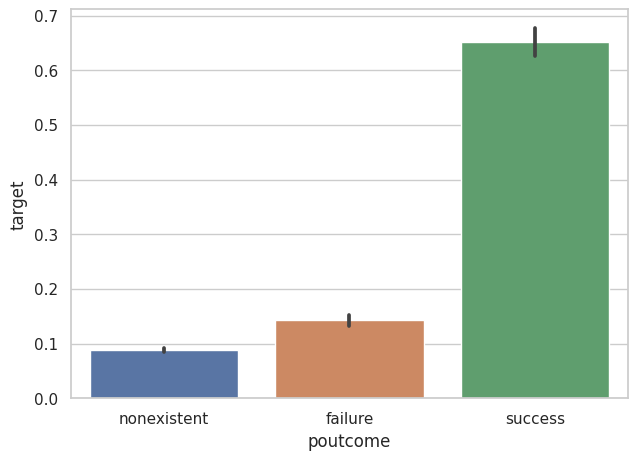

In [109]:
barplot_mean('poutcome', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.
### Note: Customers who were a success earlier are `5 times` mre likely to buy the term loan than a person who was a failure

### We will also merge `nonexistent` and `failure` together

poutcome
0    0.094085
1    0.651129
Name: target, dtype: float64


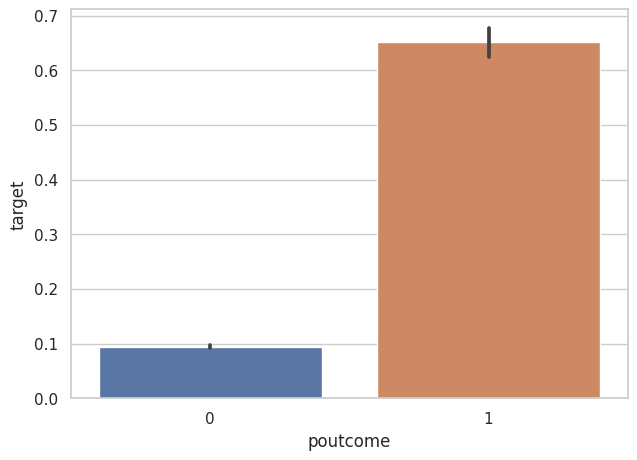

In [110]:
df['poutcome'] = np.where(df['poutcome'].isin(['nonexistent', 'failure']), 0, 1)
barplot_mean('poutcome', 'target', df)

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


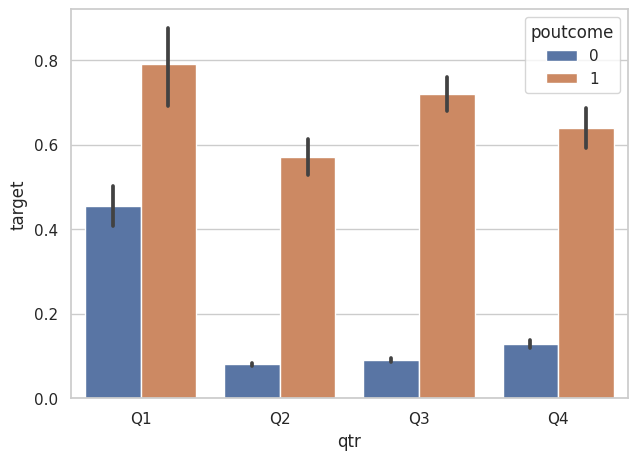

In [111]:
barplot_mean('qtr', 'target', df, hue='poutcome', order=["Q1","Q2","Q3","Q4"])

In [112]:
df[df['poutcome'] == 1].groupby('qtr')['target'].mean()

# avg. likelihood across qtr
# Q1    0.505495
# Q2    0.091349
# Q3    0.112053
# Q4    0.163967

qtr
Q1    0.790123
Q2    0.571134
Q3    0.720174
Q4    0.638728
Name: target, dtype: float64

### We observe that when we combine `poutcome` and `quarter`. We will be able to build profiles that have 5-8 times better likelihood of success when compared to the no-model scenario. `Q3` has better chances than `Q4`

### The idea is as we have seen above that `Q2` and `Q3` are not favorable in comparison to `Q1` and `Q4`, but in the practical scenario we can't stop the team to run campaigns in `Q2` and `Q3`. So we are adding surrogate variables to boost their performance.


# working with continous variables

### we will convert continuos variables into categories by binning them into ranks

# 11. age

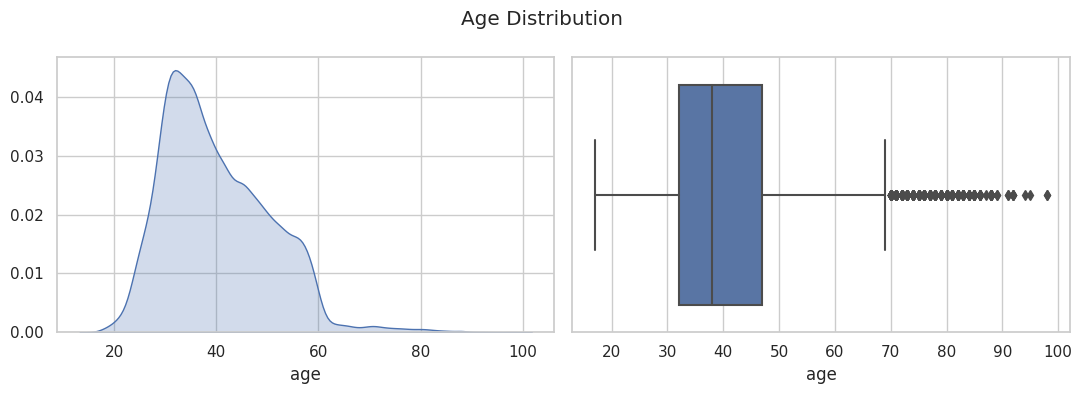

In [113]:
# Checking Age Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='age', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='age', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Age Distribution')

plt.tight_layout()
plt.show()

In [114]:
df['age_rank'] = pd.qcut(df['age'].rank(method='first').values, 5, duplicates='drop').codes+1
df['age_rank'].value_counts()

# we have divided age into 5 ranks thery distributing 20% data in each rank
# we can now see if there is any trend with respect to age on target

age_rank
5    8238
3    8238
1    8238
4    8237
2    8237
Name: count, dtype: int64

age_rank
1    0.143846
2    0.107321
3    0.084365
4    0.081947
5    0.145788
Name: target, dtype: float64


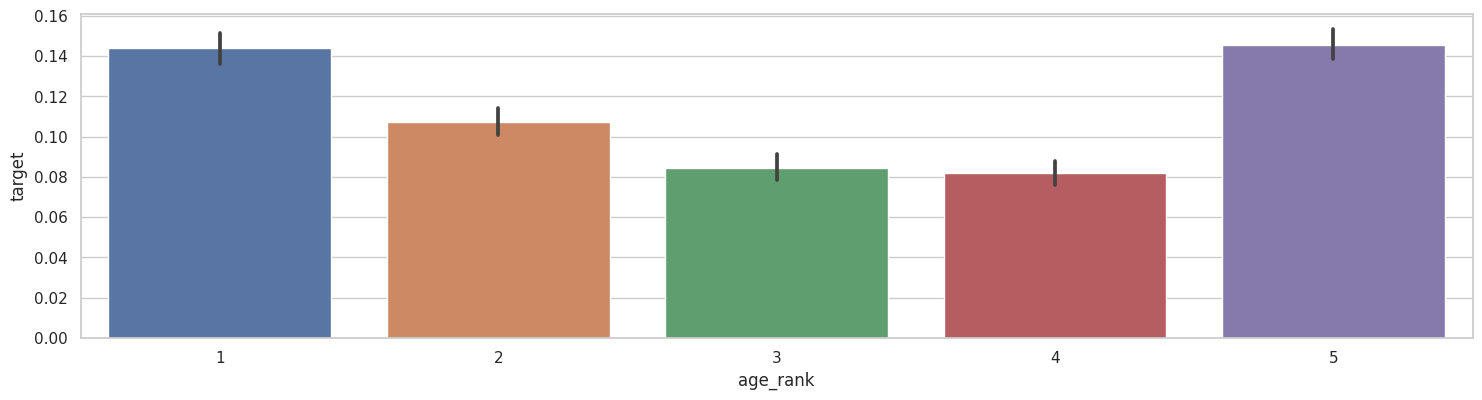

In [115]:
barplot_mean('age_rank', 'target', df)

### we see that we have `U-shaped` curve. This variable might not help us discriminate the dependent variable. The prediction will be impacted

### let us try to combine this with `qtr`

age_rank
1    0.143846
2    0.107321
3    0.084365
4    0.081947
5    0.145788
Name: target, dtype: float64


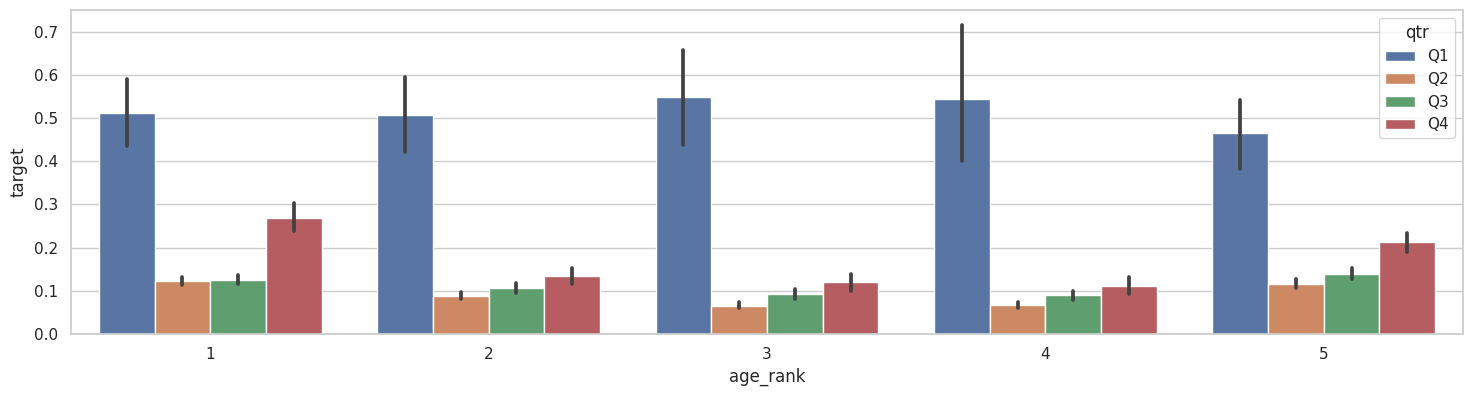

In [116]:
barplot_mean('age_rank', 'target', df, hue='qtr', hue_order=["Q1","Q2","Q3","Q4"])

### As we can infer from this graph, `Q1` seems to stand out everytime as evident earlier since it has a likelihood of `50 %`

# 12. duration

In [117]:
df['duration_rank'] = pd.qcut(df['duration'].rank(method='first').values, 5, duplicates='drop').codes+1
df['duration_rank'].value_counts()

duration_rank
3    8238
1    8238
5    8238
4    8237
2    8237
Name: count, dtype: int64

duration_rank
1    0.004613
2    0.032051
3    0.072833
4    0.123831
5    0.329934
Name: target, dtype: float64


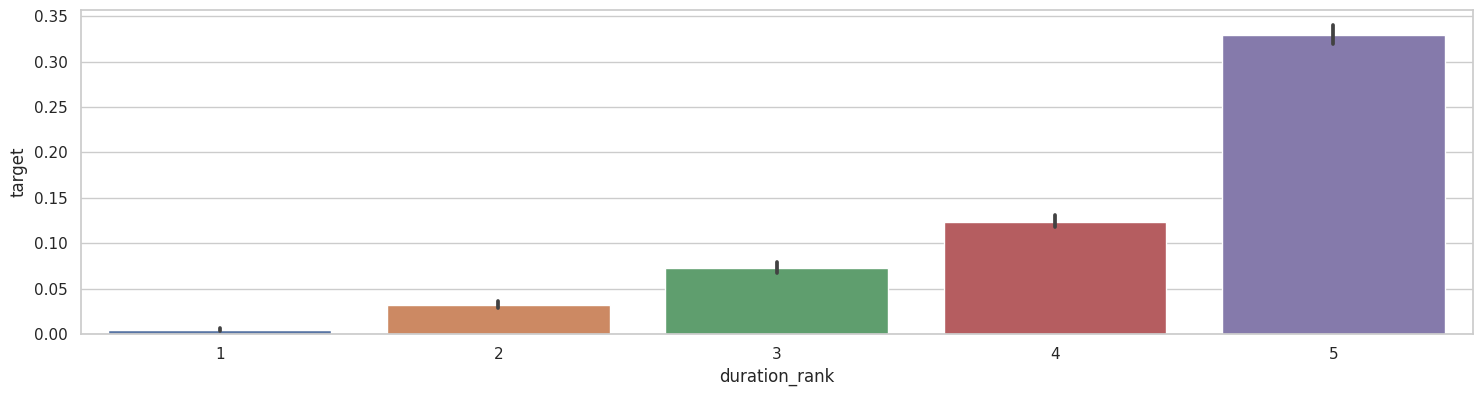

In [118]:
barplot_mean('duration_rank', 'target', df)

### From the perspective of discrimination, we see a very strong positive trend. As the duration is increasing, the chances of buying the term loan is almost doubling. This will be an excellent predictor while using in the model

### But we have to be cautious of using `duration` because by definition `duration` is last contact duration, in seconds and we do not know the duration until a call is made.

# 13. campaign

In [119]:
df['campaign_rank'] = pd.qcut(df['campaign'].rank(method='first').values, 5, duplicates='drop').codes+1
df['campaign_rank'].value_counts()

campaign_rank
1    8238
3    8238
5    8238
4    8237
2    8237
Name: count, dtype: int64

campaign_rank
1    0.043700
2    0.161345
3    0.119325
4    0.140342
5    0.098568
Name: target, dtype: float64


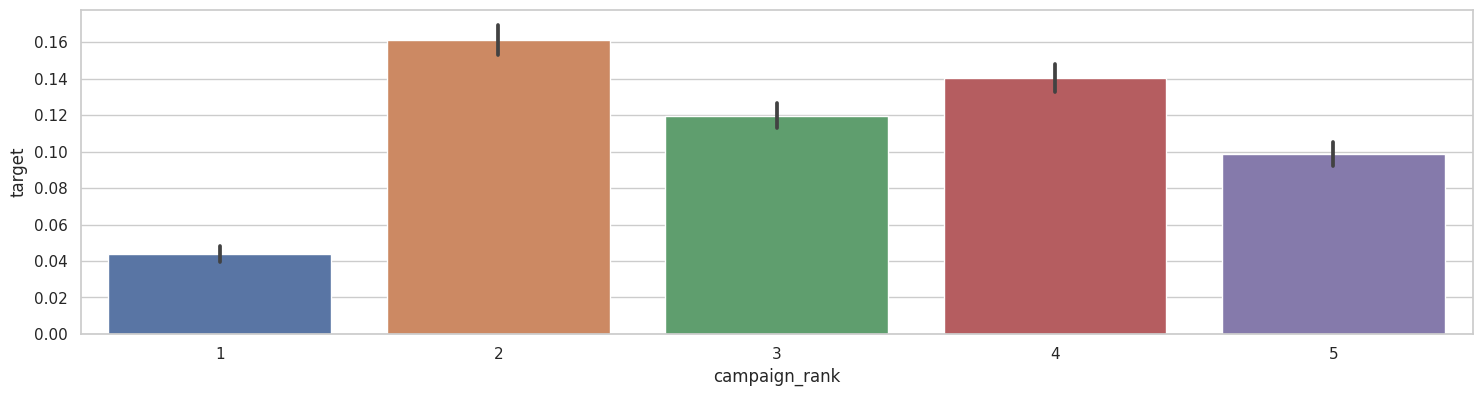

In [120]:
barplot_mean('campaign_rank', 'target', df)

### this plot is showing a non-linear trend. Let us look at what kind of value does `campaign` takes ?

In [121]:
print(df.groupby('campaign_rank')['campaign'].min())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].mean())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].max())

campaign_rank
1    1
2    1
3    1
4    2
5    3
Name: campaign, dtype: int64
******************************
campaign_rank
1    1.000000
2    1.000000
3    1.858339
4    2.575209
5    6.404224
Name: campaign, dtype: float64
******************************
campaign_rank
1     1
2     1
3     2
4     3
5    56
Name: campaign, dtype: int64


# 14. pdays

In [122]:
df['pdays_rank'] = pd.qcut(df['pdays'].rank(method='first').values, 5, duplicates='drop').codes+1
df['pdays_rank'].value_counts()

pdays_rank
1    8238
3    8238
5    8238
2    8237
4    8237
Name: count, dtype: int64

pdays_rank
1    0.141418
2    0.049168
3    0.058388
4    0.106835
5    0.207453
Name: target, dtype: float64


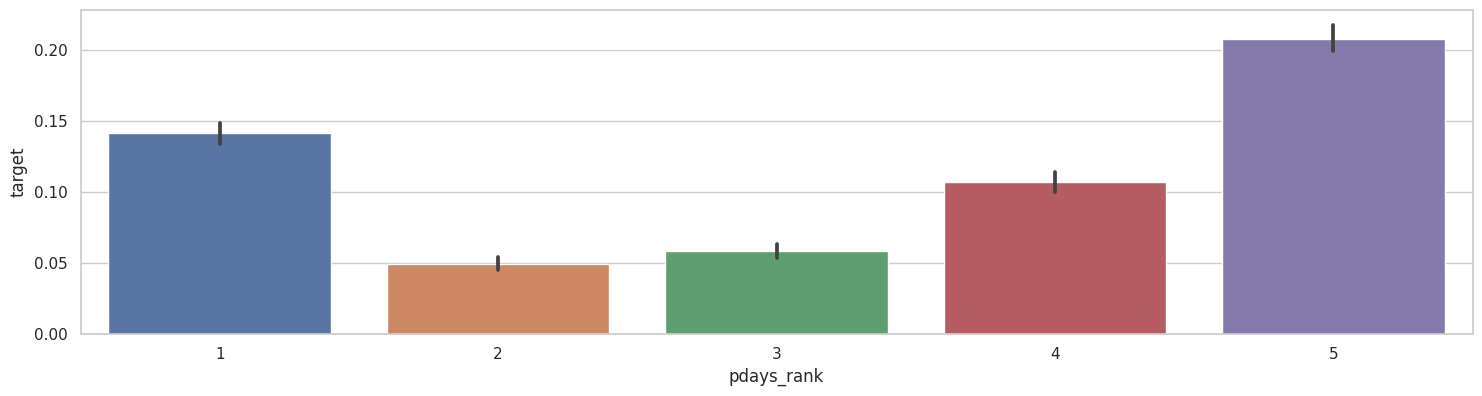

In [123]:
barplot_mean('pdays_rank', 'target', df)

In [124]:
print(df.groupby('pdays_rank')['pdays'].min())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].mean())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].max())

pdays_rank
1      0
2    999
3    999
4    999
5    999
Name: pdays, dtype: int64
******************************
pdays_rank
1    816.386137
2    999.000000
3    999.000000
4    999.000000
5    999.000000
Name: pdays, dtype: float64
******************************
pdays_rank
1    999
2    999
3    999
4    999
5    999
Name: pdays, dtype: int64


# 15. previous

In [125]:
df['prev_rank'] = pd.qcut(df['previous'].rank(method='first').values, 5, duplicates='drop').codes+1
df['prev_rank'].value_counts()

prev_rank
1    8238
3    8238
5    8238
2    8237
4    8237
Name: count, dtype: int64

prev_rank
1    0.031440
2    0.054267
3    0.058267
4    0.117154
5    0.302136
Name: target, dtype: float64


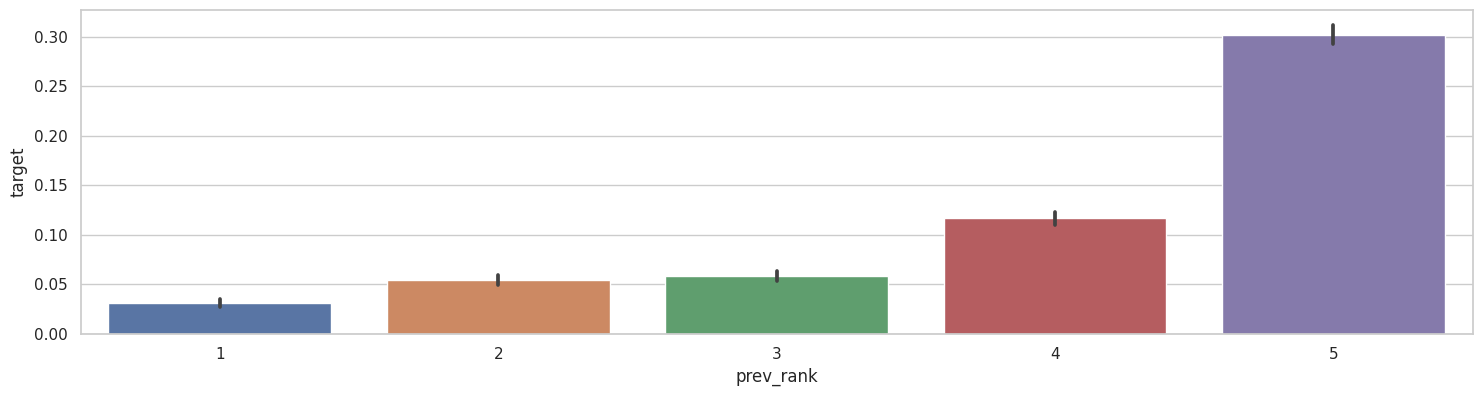

In [126]:
barplot_mean('prev_rank', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

prev_rank
1    0.031440
2    0.054267
3    0.058267
4    0.117154
5    0.302136
Name: target, dtype: float64


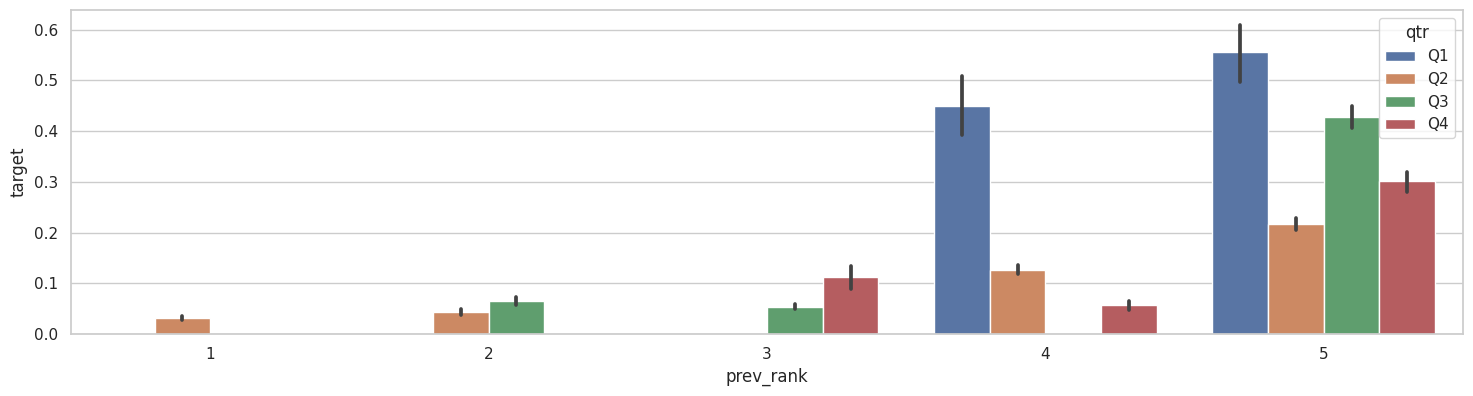

In [127]:
barplot_mean('prev_rank', 'target', df, hue='qtr', hue_order=["Q1","Q2","Q3","Q4"])

# 16. emp.var.rate

emp.var.rate_rank
1    0.230396
2    0.193881
3    0.032289
4    0.052568
5    0.054139
Name: target, dtype: float64


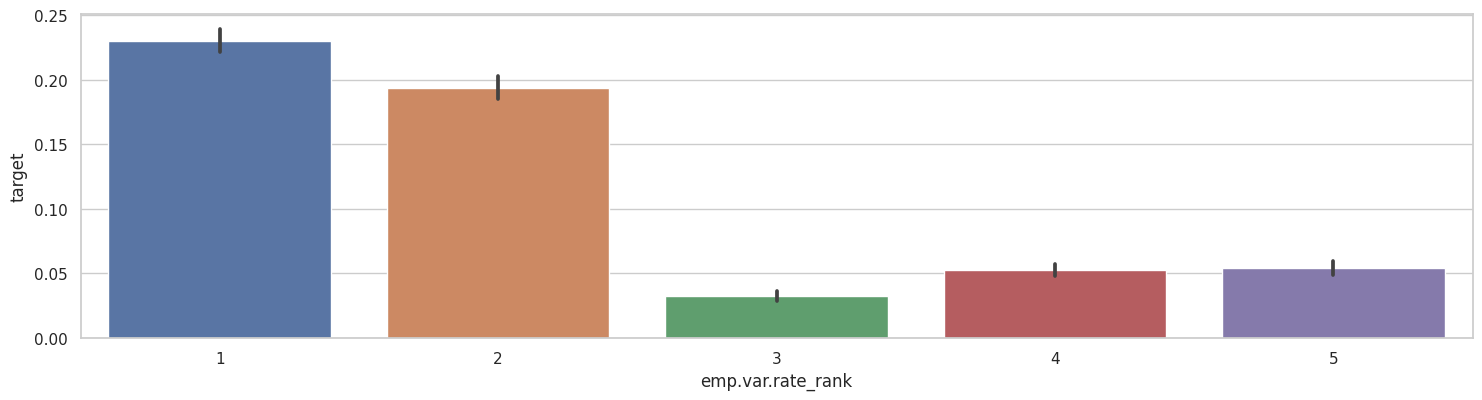

In [128]:
df['emp.var.rate_rank'] = pd.qcut(df['emp.var.rate'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('emp.var.rate_rank', 'target', df)

### This can behave as a good predictor in case of a decision tree since the lower ranks are capturing more and higher ranks are capturing less

# 17. cons.price.idx

cons.price.idx_rank
1    0.184511
2    0.136215
3    0.085700
4    0.038121
5    0.118718
Name: target, dtype: float64


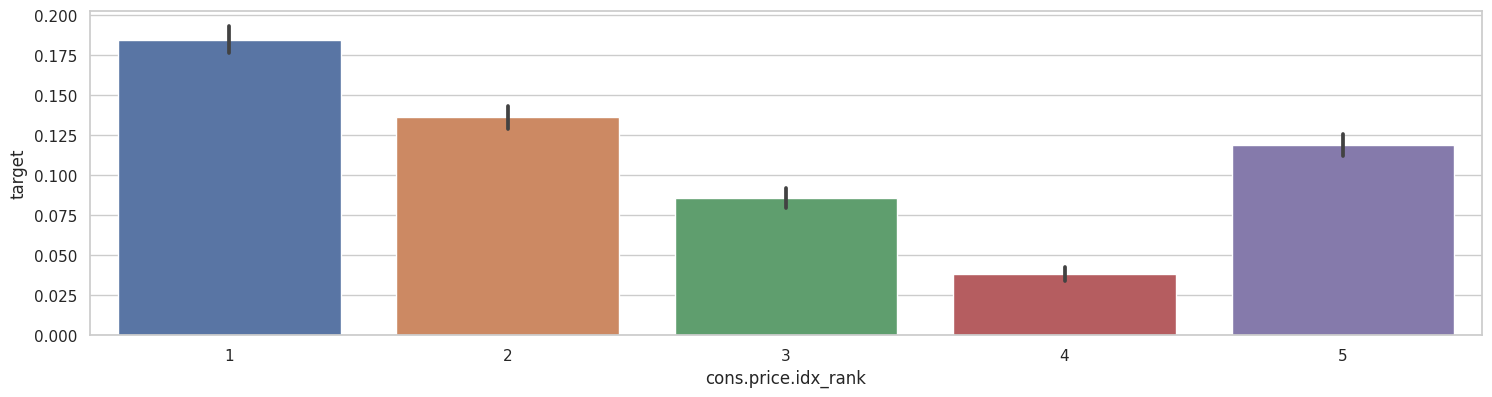

In [129]:
df['cons.price.idx_rank'] = pd.qcut(df['cons.price.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.price.idx_rank', 'target', df)

### We observe a strong slope from rank 1 to 4

# 18. cons.conf.idx

cons.conf.idx_rank
1    0.137776
2    0.068836
3    0.102088
4    0.082919
5    0.171644
Name: target, dtype: float64


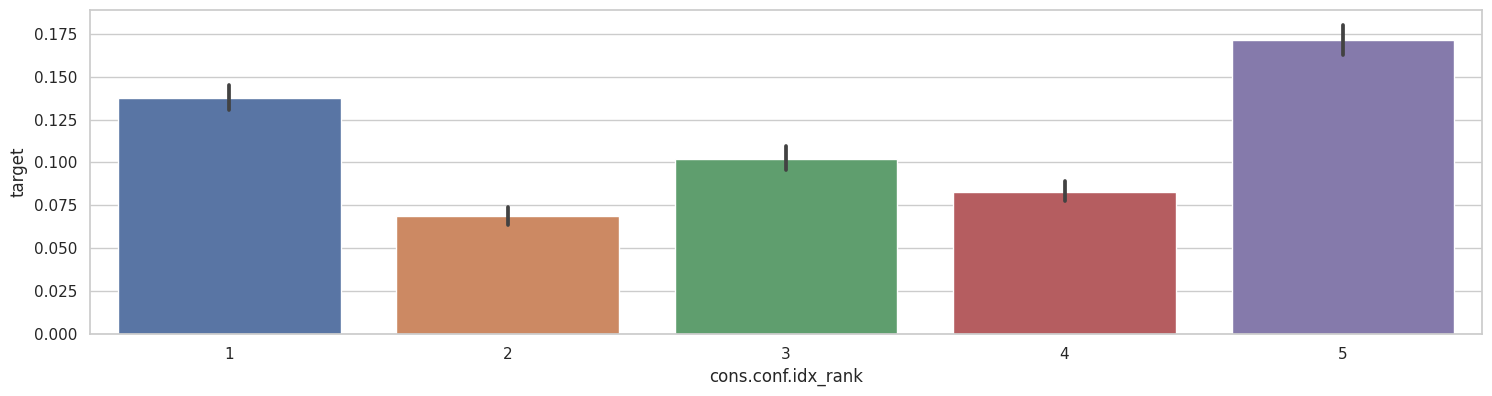

In [130]:
df['cons.conf.idx_rank'] = pd.qcut(df['cons.conf.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.conf.idx_rank', 'target', df)

### We observe that this is a very weak predictor

# 19.euribor3m

euribor3m_rank
1    0.308813
2    0.110113
3    0.034839
4    0.054389
5    0.055110
Name: target, dtype: float64


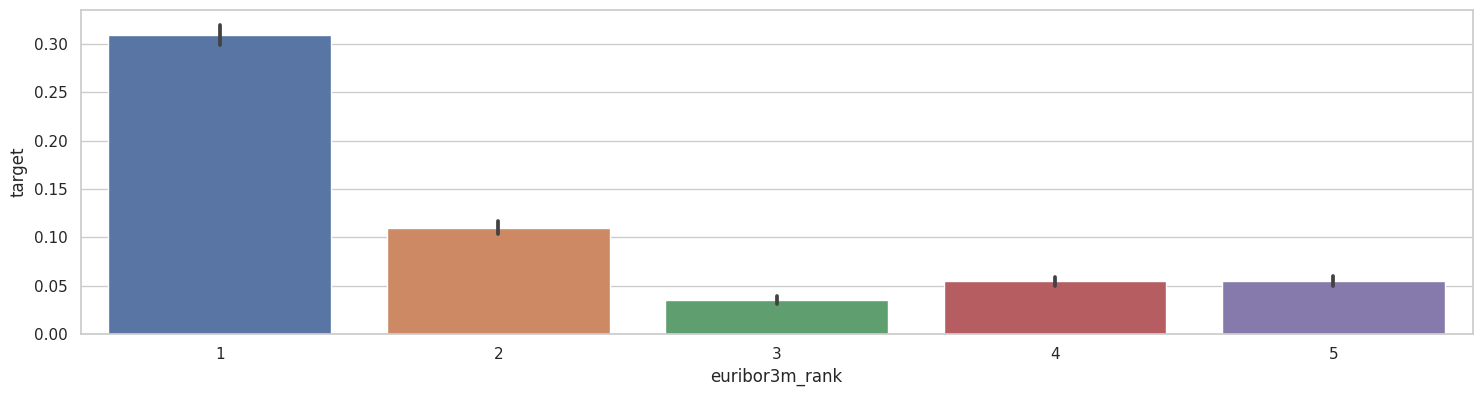

In [131]:
df['euribor3m_rank'] = pd.qcut(df['euribor3m'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('euribor3m_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences

# 20.nr.employed

nr.employed_rank
1    0.346443
2    0.063008
3    0.047706
4    0.051961
5    0.054139
Name: target, dtype: float64


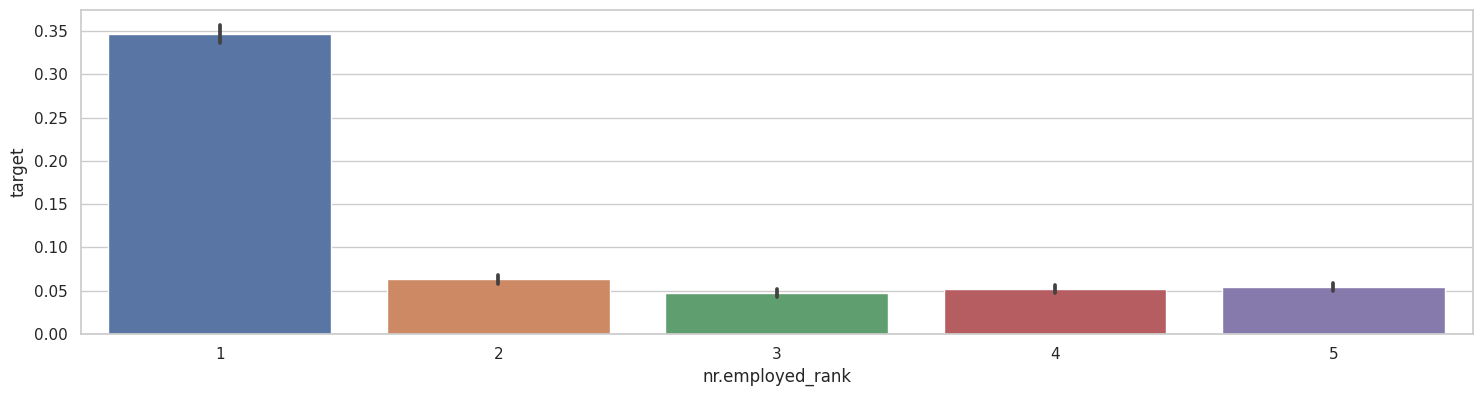

In [132]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences. Let us kbreak it into 10 ranks instead of 5

nr.employed_rank
1     0.467346
2     0.225540
3     0.070163
4     0.055852
5     0.033261
6     0.062151
7     0.042496
8     0.061423
9     0.058995
10    0.049284
Name: target, dtype: float64


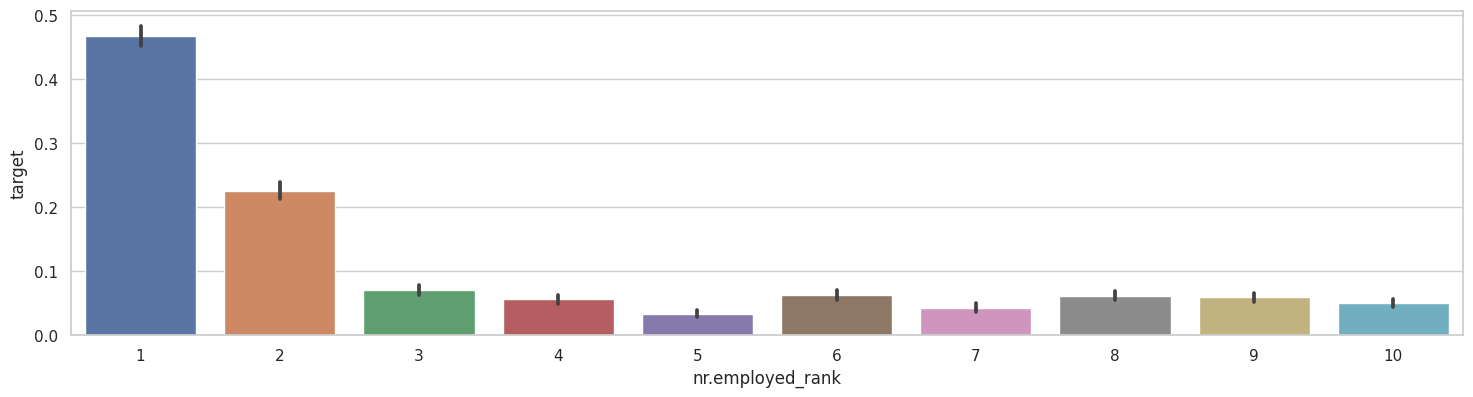

In [133]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 10, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We can see the behavior that rank 1 has now higher likelihood and the trend is going in a decreasing fashion. We can transform this to add a discrimatory slope by merging everything after the 3rd rank with itself

In [134]:
df['nr.employed_rank'] = np.where(df['nr.employed_rank'].isin(['1']), 'A', 
                                       np.where(df['nr.employed_rank'].isin(['2']), 'B', 'C'))
                                                                            
df['nr.employed_rank'].value_counts()

nr.employed_rank
C    41188
Name: count, dtype: int64

nr.employed_rank
C    0.112654
Name: target, dtype: float64


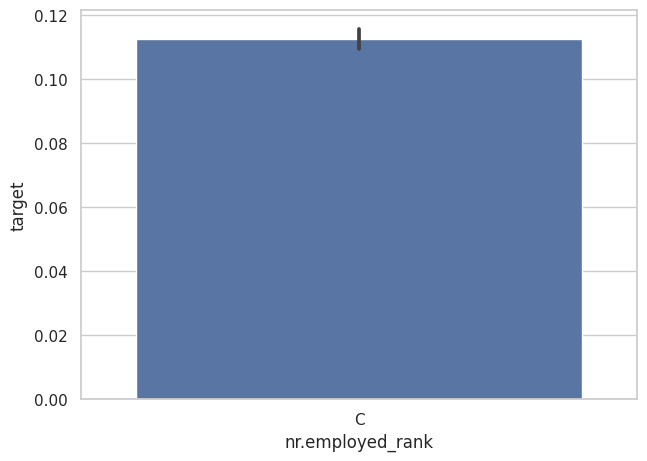

In [135]:
barplot_mean('nr.employed_rank', 'target', df)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41188 non-null  int64  
 1   job                  41188 non-null  object 
 2   marital              41188 non-null  object 
 3   education            41188 non-null  object 
 4   default              41188 non-null  object 
 5   housing              41188 non-null  object 
 6   loan                 41188 non-null  object 
 7   contact              41188 non-null  object 
 8   month                41188 non-null  object 
 9   day_of_week          41188 non-null  object 
 10  duration             41188 non-null  int64  
 11  campaign             41188 non-null  int64  
 12  pdays                41188 non-null  int64  
 13  previous             41188 non-null  int64  
 14  poutcome             41188 non-null  int64  
 15  emp.var.rate         41188 non-null 

# Modelling

In [142]:
# We are not considering education, job, day_of_week, housing, loan
cols_cat = ['default', 'contact', 'poutcome', 'nr.employed_rank']

# We are not considering age, duration, cons.conf.idx 
cols_num = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m'] #, 'duration']

# NOTE: duration is added to improve the ROC score

In [143]:
# dummy encoding categorical variable
# ref: https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki
# We are not considering age, duration, cons.conf.idx 
cols_cat_dummy = pd.get_dummies(df[cols_cat], drop_first=True)
cols_cat_dummy.head()

,poutcome,default_yes,contact_telephone
0,0,False,True
1,0,True,True
2,0,False,True
3,0,False,True
4,0,False,True


In [144]:
# categorical We are not considering age, duration, cons.conf.idx 
# numeric education, job, day_of_week, housing, loan
X_all = pd.concat([df[cols_num], cols_cat_dummy], axis=1, join='inner')
X_all.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,poutcome,default_yes,contact_telephone
0,1,999,0,1.1,93.994,4.857,0,False,True
1,1,999,0,1.1,93.994,4.857,0,True,True
2,1,999,0,1.1,93.994,4.857,0,False,True
3,1,999,0,1.1,93.994,4.857,0,False,True
4,1,999,0,1.1,93.994,4.857,0,False,True


In [145]:
# Assigning X and Y
X = X_all
y = df['target']

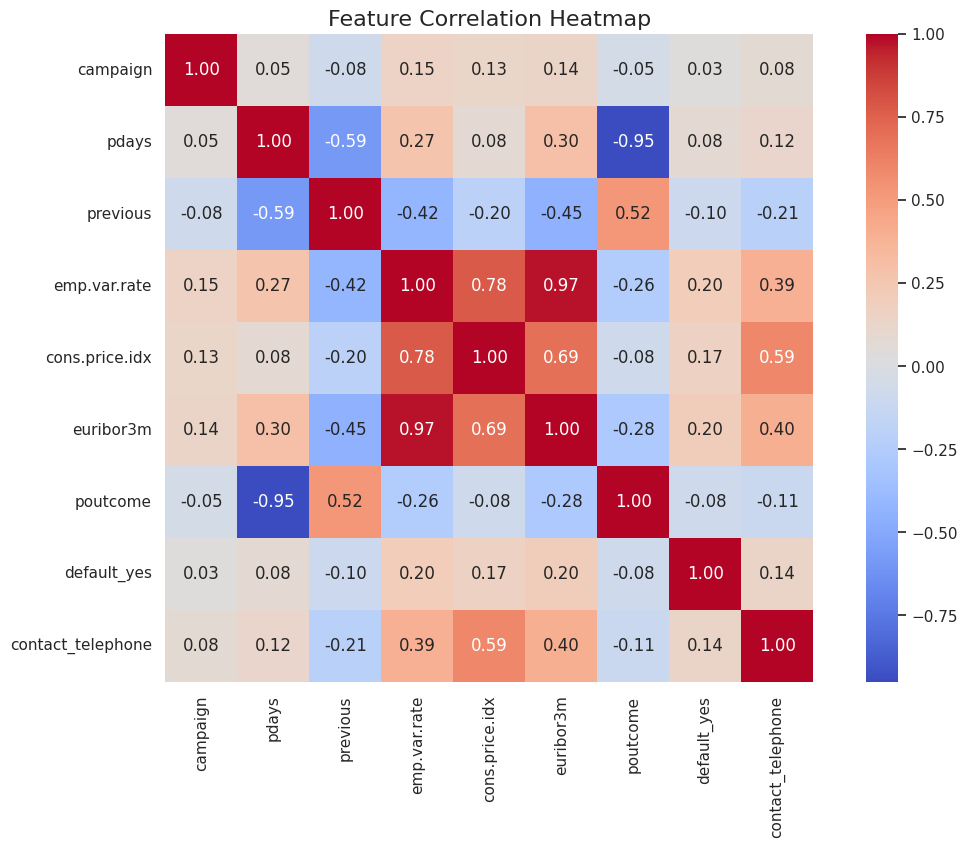

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace boolean values with numeric values (if applicable)
X_all_temp = X_all.replace({True: 1, False: 0})

# Compute the correlation matrix
corr_matrix = X_all_temp.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title
plt.title("Feature Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()


# Splitting the data set

In [147]:
# # Train-Val split 75-25
# X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=101, test_size=0.30)

# print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data loading function to split the dataset into training, validation, and test sets
def load_data_no_scaling(X, y, test_size=0.2, val_size=0.25, random_state=42):
    """
    Splits the dataset into training, validation, and test sets.

    Parameters:
    X (DataFrame or ndarray): Feature data.
    y (ndarray or Series): Target data.
    test_size (float): Proportion of the dataset to include in the test split.
    val_size (float): Proportion of the remaining data to include in the validation split.
    random_state (int): Random seed for reproducibility.

    Returns:
    X_train, X_val, X_test, y_train, y_val, y_test
    """
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Split the remaining training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test


def load_data_with_scaling(X, y, test_size=0.2, val_size=0.25, random_state=42, numeric_columns=None):
    """
    Splits the dataset into training, validation, and test sets, and standardizes numeric features.

    Parameters:
    X (DataFrame or ndarray): Feature data.
    y (ndarray or Series): Target data.
    test_size (float): Proportion of the dataset to include in the test split.
    val_size (float): Proportion of the remaining data to include in the validation split.
    random_state (int): Random seed for reproducibility.
    numeric_columns (list): List of numeric columns to standardize. If None, all columns are standardized.

    Returns:
    X_train, X_val, X_test, y_train, y_val, y_test
    """
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Split the remaining training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=random_state)

    # Standardize the numeric features
    if numeric_columns is None:
        # If no specific columns are provided, standardize all numeric columns
        numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

    scaler = StandardScaler()
    
    # Standardize the numeric columns in training, validation, and test sets
    X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
    X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
    X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

    return X_train, X_val, X_test, y_train, y_val, y_test


## Prepare the training data

In [173]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data_with_scaling(X, y)

# functions for plotting

In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import silhouette_score
import seaborn as sns
import numpy as np

# 1. Plotting Confusion Matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# 2. Plotting ROC Curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# 3. Plotting Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# 4. Plotting Silhouette Score for Clustering
def plot_silhouette_score(X, labels):
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.4f}")
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="deep")
    plt.title('Clustering with Silhouette Score')
    plt.show()

# 5. Plotting Loss and Accuracy for Deep Learning Models
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# 6. Visualizing Generated Images (For GANs, autoencoders, etc.)
def plot_generated_images(images, rows, cols):
    plt.figure(figsize=(10, 10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

from sklearn.ensemble import RandomForestClassifier

# Plotting Feature Importance
def plot_feature_importance(model, X_train):
    feature_importances = model.feature_importances_
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances)
    plt.title('Feature Importance')
    plt.show()

# Visualizing Clusters in 2D (For KMeans or other clustering models)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def plot_clusters(X, cluster_labels):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=cluster_labels, palette="deep")
    plt.title('2D Visualization of Clusters')
    plt.show()

# Plotting Class Distribution (Bias in Data)
def plot_class_distribution(y):
    plt.figure(figsize=(6, 6))
    sns.countplot(x=y)
    plt.title('Class Distribution')
    plt.show()

# Resampling Techniques

#### a. Oversampling the Minority Class:
This involves increasing the number of samples from the minority class by duplicating existing samples or generating synthetic samples using techniques like SMOTE (Synthetic Minority Over-sampling Technique). Oversampling helps balance the distribution of the classes and provides the model with more data points to learn from for the minority class.

In [165]:
# Oversampling the Minority Class:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


#### b. Undersampling the Majority Class:
Undersampling reduces the number of samples from the majority class to match the size of the minority class. While effective, it may lead to loss of information.

In [166]:
# Undersampling the Majority Class:
from imblearn.under_sampling import RandomUnderSampler

# Apply random undersampling to the majority class
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)


#### c. Combination of Over- and Under-sampling:
You can combine both methods to create a balanced dataset, using techniques like SMOTEENN (SMOTE + Edited Nearest Neighbors) or SMOTETomek (SMOTE + Tomek links).

In [167]:
# Combination of Over- and Under-sampling:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

### Resampling with SMOTETomek 

Before SMOTETomek:
target
0    21923
1     2789
Name: count, dtype: int64

After SMOTETomek:
target
0    21767
1    21767
Name: count, dtype: int64


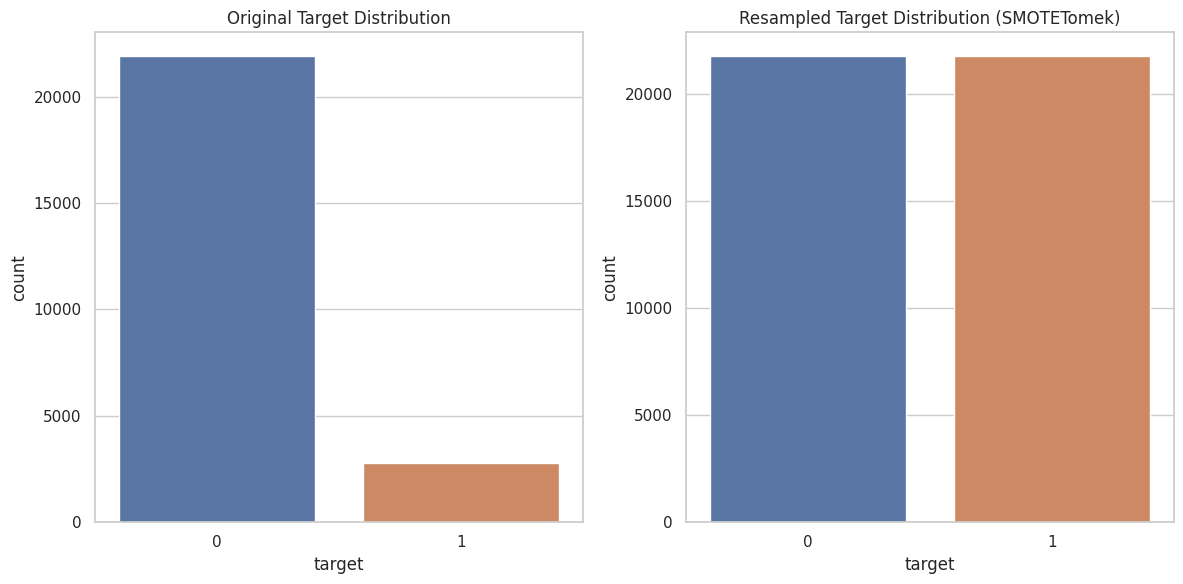

In [165]:
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check distribution of target variable before resampling
print("Before SMOTETomek:")
print(y_train.value_counts())  # Original distribution

# Check distribution of target variable after resampling
print("\nAfter SMOTETomek:")
print(y_train_resampled.value_counts())  # Resampled distribution

# Visualize the distribution of the target variable before and after resampling

import seaborn as sns
import matplotlib.pyplot as plt

# Plot before resampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Target Distribution")

# Plot after resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Resampled Target Distribution (SMOTETomek)")

plt.tight_layout()
plt.show()


# models

In [150]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10],                       # Regularization strength
            'max_iter': [100, 200, 300],                   # Maximum number of iterations
            'penalty': ['l1', 'l2']                        # Regularization type
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=101),
        'param_grid': {
            'max_depth': [5, 10, 20, None],                # Depth of the tree
            'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
            'min_samples_leaf': [1, 2, 4],                 # Minimum samples required in a leaf node
            'criterion': ['gini', 'entropy']               # Splitting criteria
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=101),
        'param_grid': {
            'n_estimators': [100, 200, 500],               # Number of trees in the forest
            'max_depth': [5, 10, 20, None],                # Depth of the tree
            'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
            'min_samples_leaf': [1, 2, 4],                 # Minimum samples required in a leaf node
            'max_features': [ 'sqrt', 'log2']       # Number of features to consider for split
        }
    }
}


models_complex = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength
            'max_iter': [100, 200, 300, 500],              # Maximum number of iterations
            'penalty': ['l1', 'l2'],                       # Regularization type
            'tol': [1e-4, 1e-3, 1e-2],                     # Tolerance for stopping criteria
            'fit_intercept': [True, False],                 # Whether to include an intercept
            'solver': ['liblinear', 'saga'],                # Solver algorithm to use
            'class_weight': [None, 'balanced']              # Handle imbalanced classes
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=101),
        'param_grid': {
            'max_depth': [5, 10, 20, None],                 # Maximum depth of the tree
            'min_samples_split': [2, 5, 10, 20],            # Minimum samples required to split an internal node
            'min_samples_leaf': [1, 2, 4, 10],              # Minimum samples required to be at a leaf node
            'criterion': ['gini', 'entropy'],               # Split quality criterion
            'max_features': [None, 'sqrt', 'log2'],         # Number of features to consider for a split
            'splitter': ['best', 'random'],                 # Strategy for splitting at each node
            'class_weight': [None, 'balanced']              # Handle imbalanced classes
        }
    },
     'Random Forest': {
        'model': RandomForestClassifier(random_state=101),
        'param_grid': {
            'n_estimators': [100, 200, 500, 1000],
            'max_depth': [5, 10, 20, None],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 10],
            # Updated max_features to avoid warnings
            'max_features': ['sqrt', 'log2'],  # Removed 'auto'
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'warm_start': [True, False],
            'class_weight': [None, 'balanced'],
            'criterion': ['gini', 'entropy'],
            'n_jobs': [-1],
            'max_samples': [None, 0.5, 0.8]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=101),
        'param_grid': {
            'n_estimators': [50, 100, 200],                # The number of estimators (trees or models)
            'learning_rate': [0.01, 0.1, 1, 10],           # Weight applied to each classifier
            'algorithm': ['SAMME', 'SAMME.R'],              # Algorithm for updating weights
            'random_state': [101],                          # Random state for reproducibility
            'loss': ['linear', 'square', 'exponential']     # Loss function to use for weight update
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=101),
        'param_grid': {
            'C': [0.01, 0.1, 1, 10, 100],                  # Regularization parameter
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel type to be used in the algorithm
            'degree': [3, 4, 5],                           # Degree of the polynomial kernel function
            'gamma': ['scale', 'auto', 0.1, 1],            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
            'tol': [1e-4, 1e-3, 1e-2],                     # Tolerance for stopping criteria
            'class_weight': [None, 'balanced'],             # Handle imbalanced classes
            'decision_function_shape': ['ovo', 'ovr']       # Whether to use One-vs-Rest or One-vs-One
        }
    }
}


## without hyperparameter tuning

Training Logistic Regression...
Confusion Matrix for Logistic Regression:


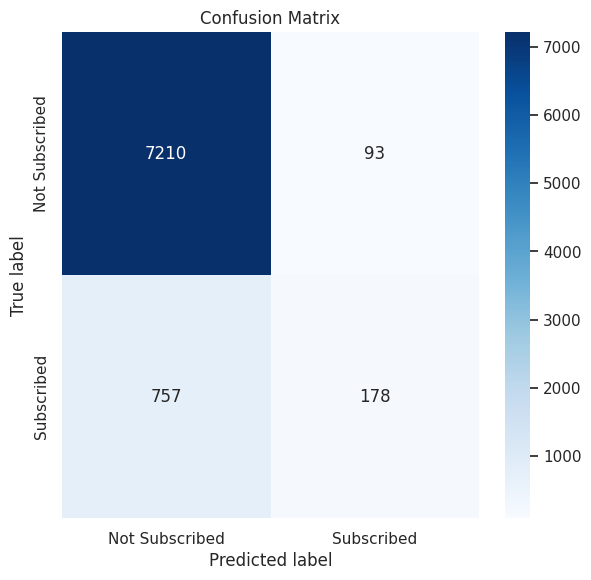

Training Decision Tree...
Confusion Matrix for Decision Tree:


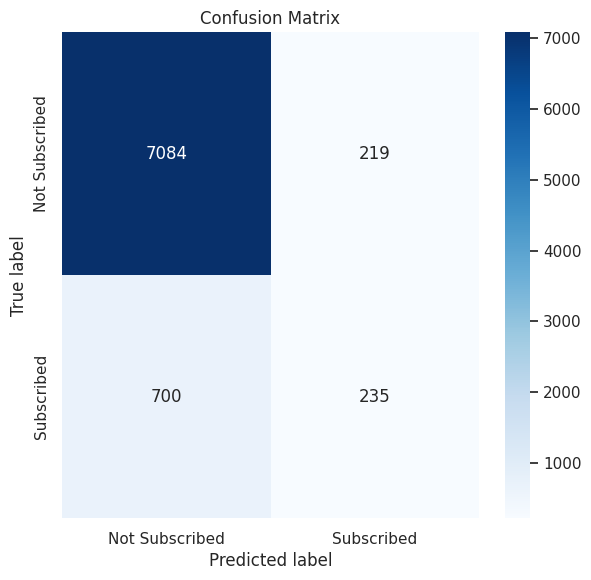

Training Random Forest...
Confusion Matrix for Random Forest:


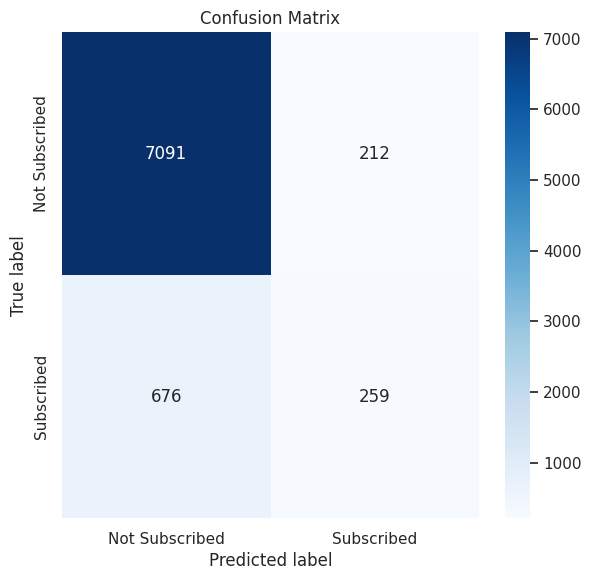

Training AdaBoost...
Confusion Matrix for AdaBoost:


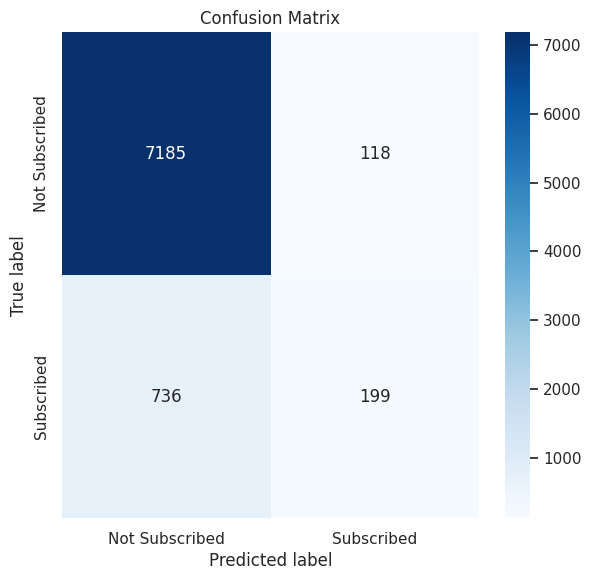

Training SVM...
Confusion Matrix for SVM:


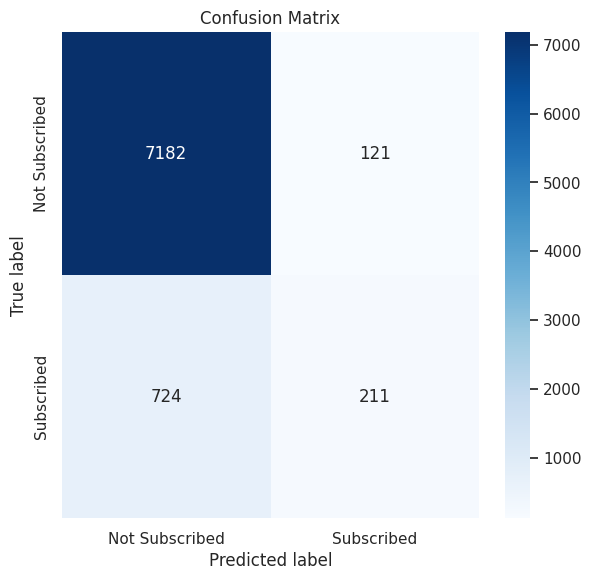

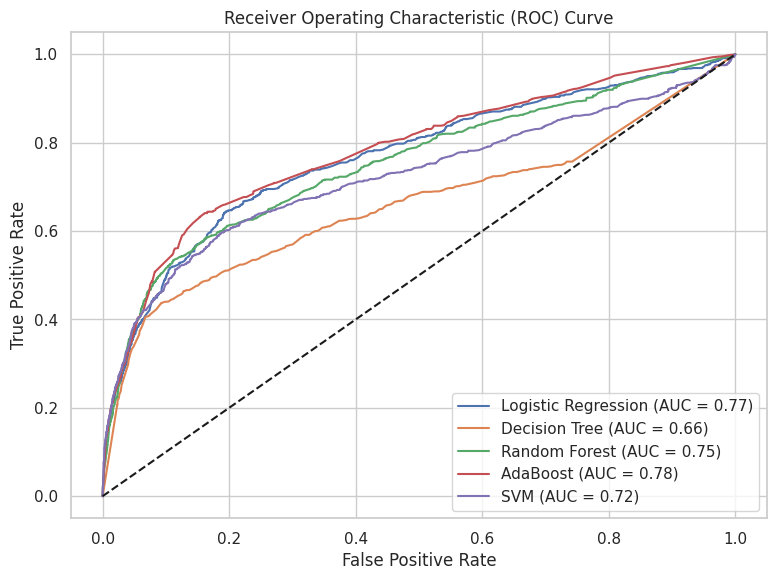

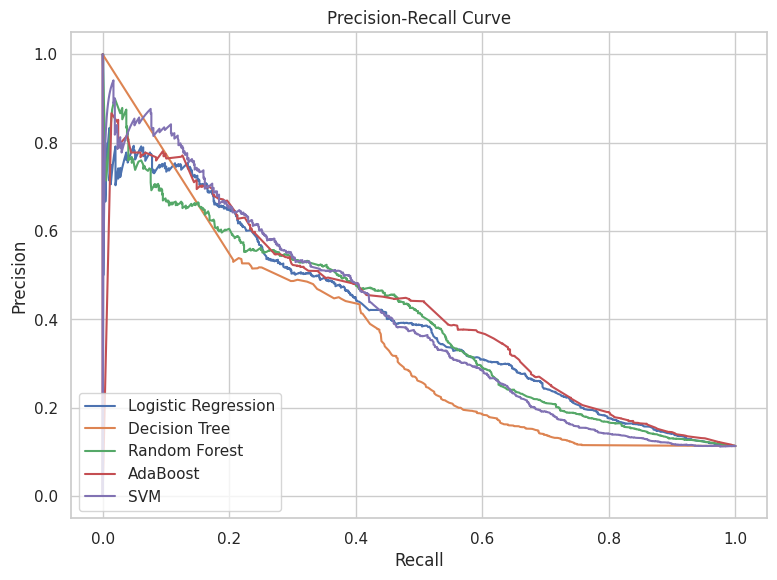


Model Evaluation Metrics:
                     Accuracy  F1 Score  Precision    Recall   ROC AUC
Logistic Regression  0.896820  0.295191   0.656827  0.190374  0.767193
Decision Tree        0.888444  0.338373   0.517621  0.251337  0.659524
Random Forest        0.892207  0.368421   0.549894  0.277005  0.753084
AdaBoost             0.896334  0.317891   0.627760  0.212834  0.782388
SVM                  0.897427  0.333070   0.635542  0.225668  0.723587


In [151]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
import pandas as pd

# Suppress warnings (optional, but can be helpful)
warnings.filterwarnings('ignore', category=UserWarning)  # Suppress FutureWarnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)  # Suppress ConvergenceWarnings

# Model Dictionary with adjusted hyperparameters to avoid convergence and warning issues
models = {
    'Logistic Regression': LogisticRegression(max_iter=20000, tol=1e-4, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(max_features='sqrt'),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True, max_iter=10000, kernel='rbf')
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# Function to plot ROC curve for multiple models
def plot_roc_curve(y_true, models_proba):
    plt.figure(figsize=(8, 6))
    for model_name, y_pred_proba in models_proba.items():
        fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve for multiple models
def plot_precision_recall_curve(y_true, models_proba):
    plt.figure(figsize=(8, 6))
    for model_name, y_pred_proba in models_proba.items():
        precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
        plt.plot(recall, precision, label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

# Function to train, validate, and test models
def train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test):
    results = {}
    models_proba = {}

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)

        # Predictions and probabilities
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'ROC AUC': roc_auc
        }

        # Store probability for ROC and Precision-Recall curves
        models_proba[model_name] = y_pred_proba

        # Plot confusion matrix for each model
        print(f"Confusion Matrix for {model_name}:")
        plot_confusion_matrix(cm, classes=['Not Subscribed', 'Subscribed'])

    # Plot ROC and Precision-Recall curves for all models
    plot_roc_curve(y_test, models_proba)
    plot_precision_recall_curve(y_test, models_proba)

    return results


# Call the function to train and evaluate
results = train_and_evaluate_models(X_train, X_val, X_test, y_train, y_val, y_test)

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Metrics:")
print(results_df)


## resampling and then training the algorithms

Training Logistic Regression...
Confusion Matrix for Logistic Regression:


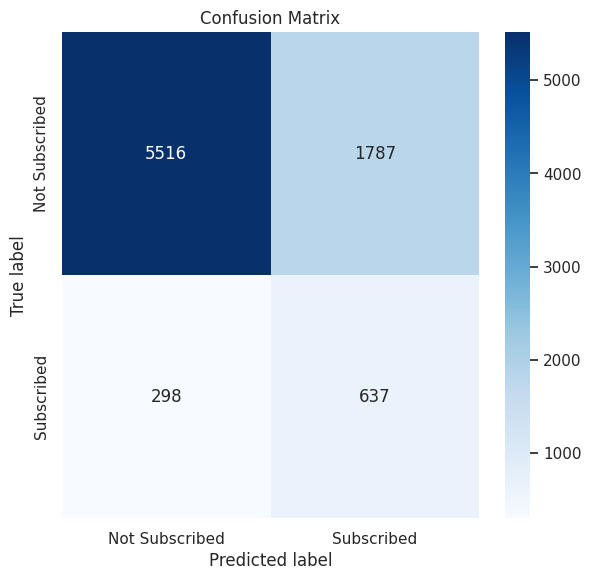

Training Decision Tree...
Confusion Matrix for Decision Tree:


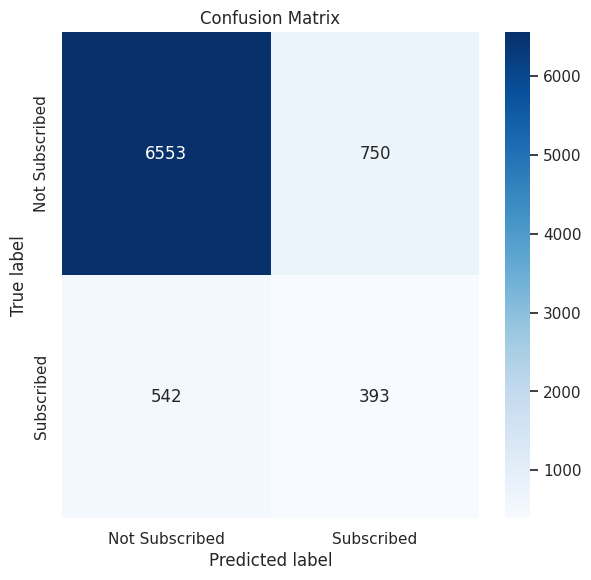

Training Random Forest...
Confusion Matrix for Random Forest:


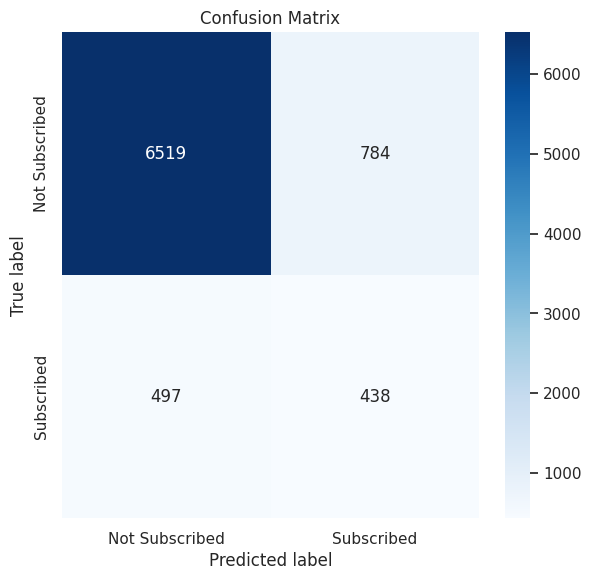

Training AdaBoost...
Confusion Matrix for AdaBoost:


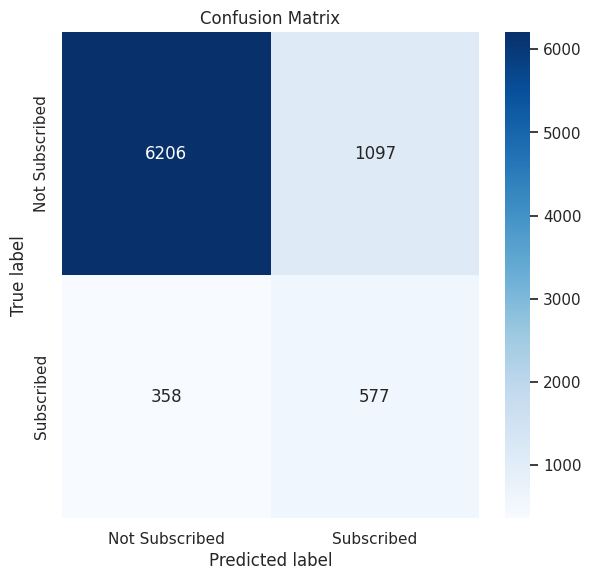

Training SVM...
Confusion Matrix for SVM:


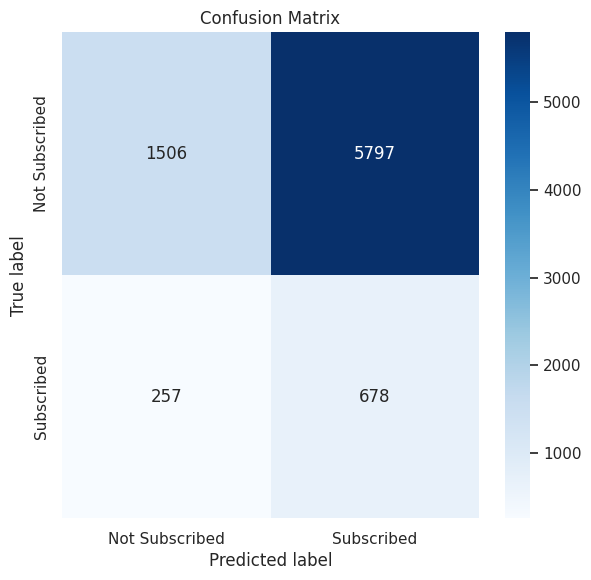

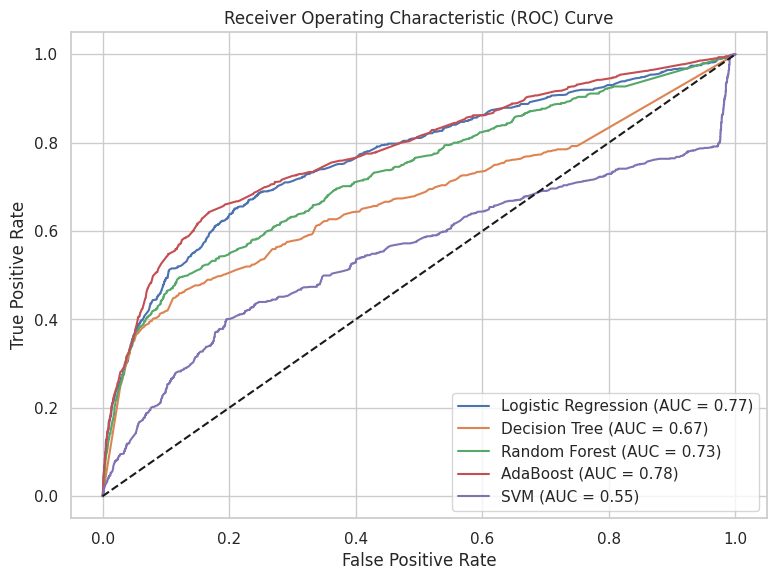

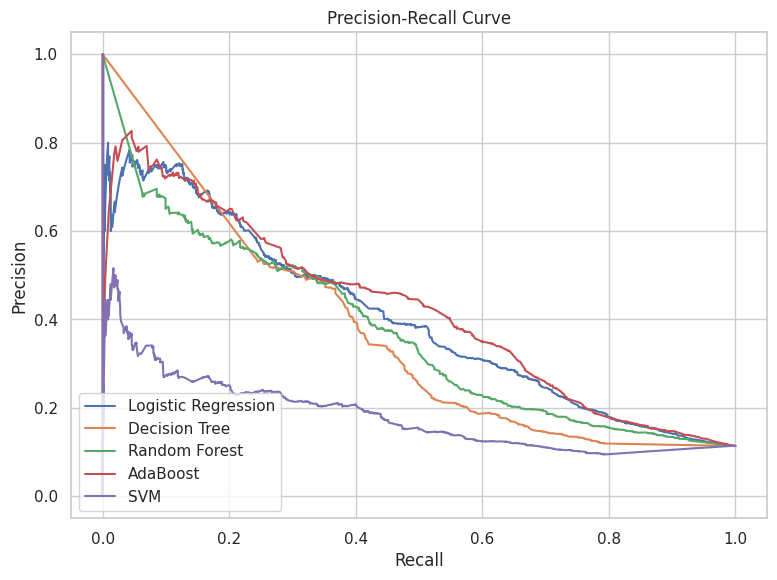


Model Evaluation Metrics:
                     Accuracy  F1 Score  Precision    Recall   ROC AUC
Logistic Regression  0.746905  0.379280   0.262789  0.681283  0.767360
Decision Tree        0.843166  0.378248   0.343832  0.420321  0.669633
Random Forest        0.844501  0.406120   0.358429  0.468449  0.729213
AdaBoost             0.823379  0.442315   0.344683  0.617112  0.779965
SVM                  0.265113  0.182996   0.104710  0.725134  0.550228


In [152]:
# Combination of Over- and Under-sampling:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)


# Call the function to train and evaluate
results = train_and_evaluate_models(X_train_resampled, X_val, X_test, y_train_resampled, y_val, y_test)

# Convert the results to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Metrics:")
print(results_df)

## Grid search for hyperparameter tuning

In [170]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve
import pandas as pd


# Suppress warnings (optional, but can be helpful)
warnings.filterwarnings('ignore', category=UserWarning)  # Suppress FutureWarnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)  # Suppress ConvergenceWarnings


class ModelEvaluation:
    def __init__(self, models):
        self.models = models
        self.results = {}
        self.models_proba = {}

    def plot_confusion_matrix(self, cm, classes):
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_roc_curve(self, y_true):
        plt.figure(figsize=(8, 6))
        for model_name, y_pred_proba in self.models_proba.items():
            fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_pred_proba):.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()

    def plot_precision_recall_curve(self, y_true):
        plt.figure(figsize=(8, 6))
        for model_name, y_pred_proba in self.models_proba.items():
            precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
            plt.plot(recall, precision, label=f'{model_name}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()

    def train_and_evaluate(self, X_train, X_test, y_train, y_test):
        for model_name, model_info in self.models.items():
            print(f"Training {model_name}...")

            # Grid Search Cross-validation
            grid_search = GridSearchCV(model_info['model'], model_info['param_grid'], cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_

            # Cross-validation score
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
            mean_cv_score = cv_scores.mean()
            print(f"Cross-validation mean accuracy for {model_name}: {mean_cv_score:.4f}")
            print(f"Best parameters for {model_name}: {grid_search.best_params_}")

            # Predictions and probabilities
            y_pred = best_model.predict(X_test)
            y_pred_proba = best_model.predict_proba(X_test)[:, 1]

            # Evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, y_pred_proba)
            cm = confusion_matrix(y_test, y_pred)

            # Store results
            self.results[model_name] = {
                'Accuracy': accuracy,
                'F1 Score': f1,
                'Precision': precision,
                'Recall': recall,
                'ROC AUC': roc_auc,
                'CV Accuracy': mean_cv_score
            }

            # Store probability for ROC and Precision-Recall curves
            self.models_proba[model_name] = y_pred_proba

            # Plot confusion matrix for each model
            print(f"Confusion Matrix for {model_name}:")
            self.plot_confusion_matrix(cm, classes=['Not Subscribed', 'Subscribed'])

        # Plot ROC and Precision-Recall curves for all models
        self.plot_roc_curve(y_test)
        self.plot_precision_recall_curve(y_test)

        # Create a DataFrame for the results and print it
        results_df = pd.DataFrame(self.results).T
        print("\nModel Evaluation Summary:")
        print(results_df)


class ModelSelector:
    def __init__(self):
        self.models = {
            'Logistic Regression': {
                'model': LogisticRegression(solver='liblinear'),
                'param_grid': {
                    'C': [0.01, 0.1, 1, 10],                       # Regularization strength
                    'max_iter': [100, 200, 300],                   # Maximum number of iterations
                    'penalty': ['l1', 'l2']                        # Regularization type
                }
            },
            'Decision Tree': {
                'model': DecisionTreeClassifier(random_state=101),
                'param_grid': {
                    'max_depth': [5, 10, 20, None],                # Depth of the tree
                    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
                    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required in a leaf node
                    'criterion': ['gini', 'entropy']               # Splitting criteria
                }
            },
            'Random Forest': {
                'model': RandomForestClassifier(random_state=101),
                'param_grid': {
                    'n_estimators': [100, 200],               # Number of trees in the forest
                    'max_depth': [5, 10, 20, None],                # Depth of the tree
                    'min_samples_split': [2, 5, 10],               # Minimum samples required to split a node
                    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required in a leaf node
                    'max_features': ['sqrt', 'log2']               # Number of features to consider for split
                }
            }
        }

    def get_models(self):
        return self.models


class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model_selector = ModelSelector()
        self.model_evaluation = ModelEvaluation(self.model_selector.get_models())

    def train(self):
        self.model_evaluation.train_and_evaluate(self.X_train, self.X_test, self.y_train, self.y_test)

Training Logistic Regression...
Cross-validation mean accuracy for Logistic Regression: 0.8990
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'penalty': 'l1'}
Confusion Matrix for Logistic Regression:


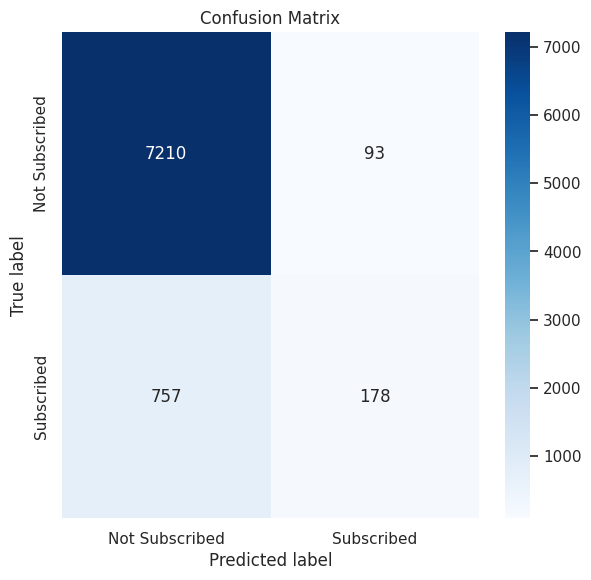

Training Decision Tree...
Cross-validation mean accuracy for Decision Tree: 0.8988
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix for Decision Tree:


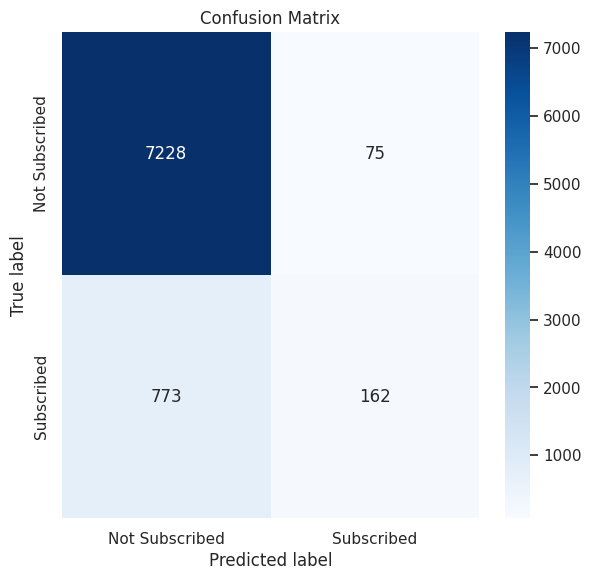

Training Random Forest...
Cross-validation mean accuracy for Random Forest: 0.9020
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Confusion Matrix for Random Forest:


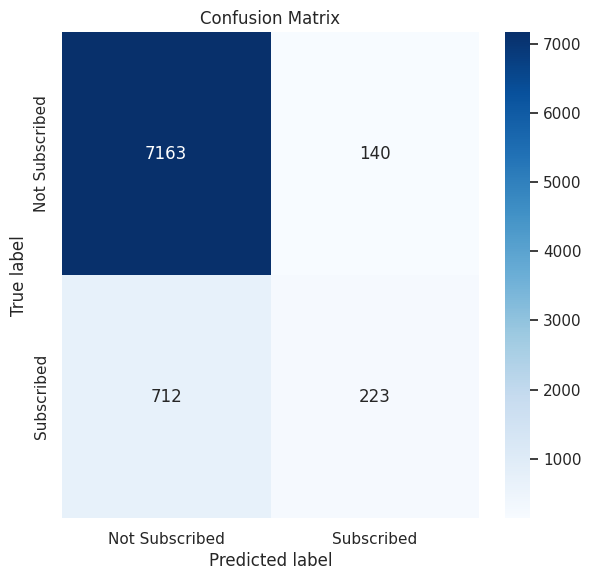

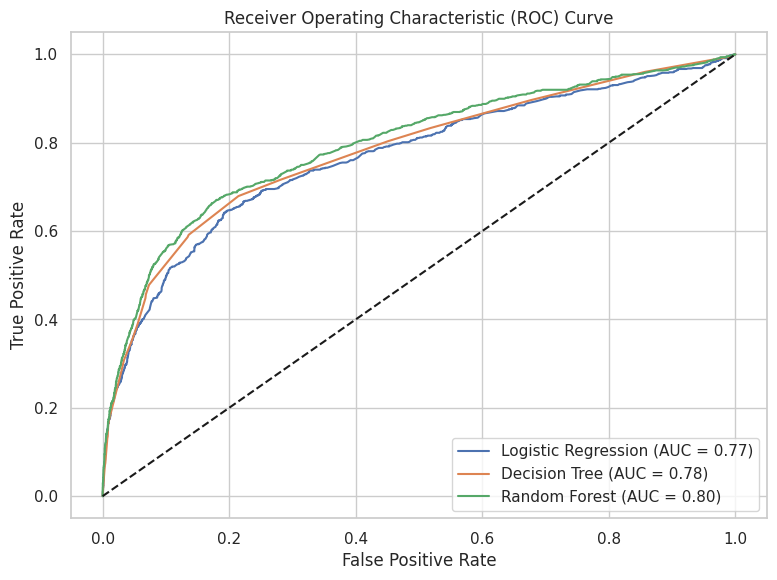

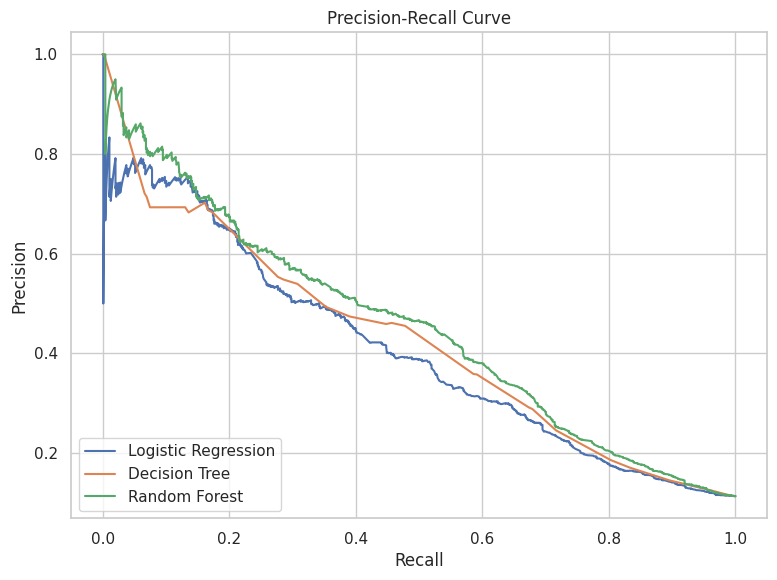


Model Evaluation Summary:
                     Accuracy  F1 Score  Precision    Recall   ROC AUC  \
Logistic Regression  0.896820  0.295191   0.656827  0.190374  0.767238   
Decision Tree        0.897062  0.276451   0.683544  0.173262  0.780156   
Random Forest        0.896577  0.343606   0.614325  0.238503  0.795258   

                     CV Accuracy  
Logistic Regression     0.898956  
Decision Tree           0.898835  
Random Forest           0.901991  


In [171]:
# Example usage:
model_trainer = ModelTrainer(X_train, X_test, y_train, y_test)
model_trainer.train()

## Best model with resampling

Training Logistic Regression...
Cross-validation mean accuracy for Logistic Regression: 0.7243
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Confusion Matrix for Logistic Regression:


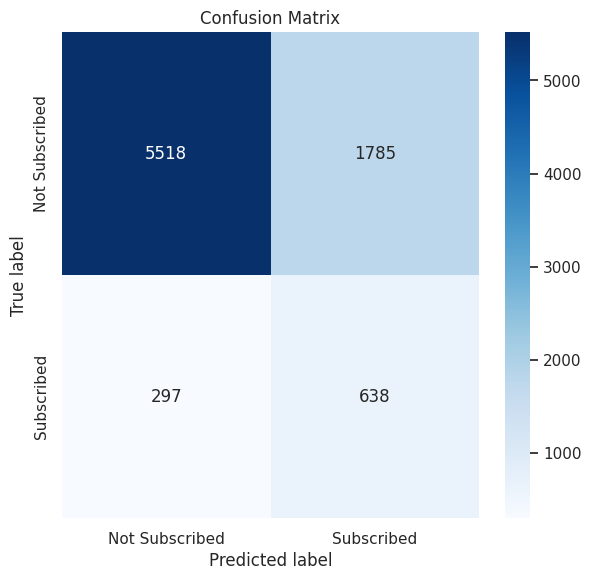

Training Decision Tree...
Cross-validation mean accuracy for Decision Tree: 0.8404
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix for Decision Tree:


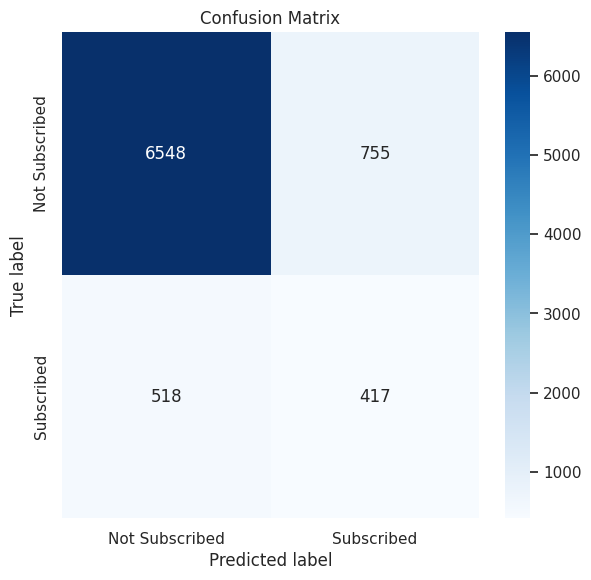

Training Random Forest...
Cross-validation mean accuracy for Random Forest: 0.8423
Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix for Random Forest:


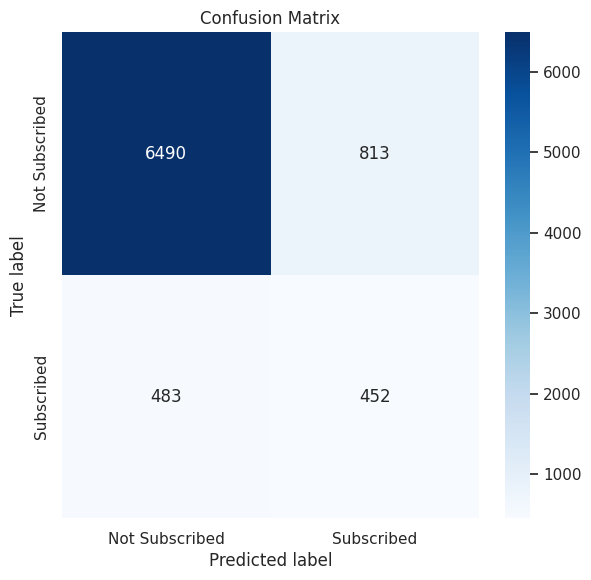

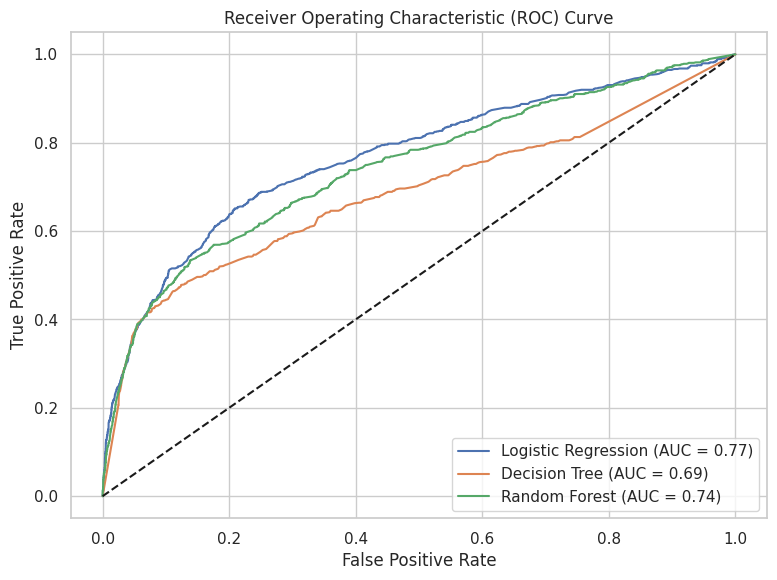

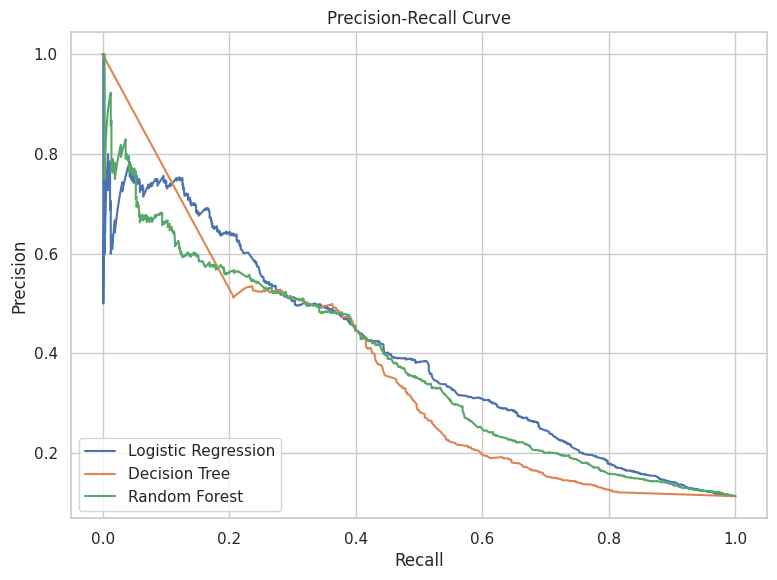


Model Evaluation Summary:
                     Accuracy  F1 Score  Precision    Recall   ROC AUC  \
Logistic Regression  0.747269  0.379988   0.263310  0.682353  0.767340   
Decision Tree        0.845472  0.395823   0.355802  0.445989  0.685082   
Random Forest        0.842680  0.410909   0.357312  0.483422  0.744764   

                     CV Accuracy  
Logistic Regression     0.724308  
Decision Tree           0.840378  
Random Forest           0.842307  


In [172]:
# Combination of Over- and Under-sampling:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek for resampling
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Example usage:
model_trainer = ModelTrainer(X_train_resampled, X_test, y_train_resampled, y_test)
model_trainer.train()

** Model Comparison: Key Observations**

| Aspect | Before Resampling | After Resampling |
| --- | --- | --- |
| Top Performer | Random Forest (Best F1, ROC AUC) | Decision Tree (Best Accuracy) |
| Class Imbalance | Models favored the majority class | Improved recall for minority class |
| Random Forest | Strong overall performance | Balanced F1 and Recall |
| Logistic Regression | High precision but low recall | Best recall, lower precision |

**Insights**

1.  **Random Forest** performed consistently well before and after resampling, showing its robustness.
2.  **Decision Tree** excelled after resampling, demonstrating its ability to handle balanced datasets effectively.
3.  **Logistic Regression** achieved the highest recall after resampling, making it ideal for applications prioritizing positive class detection.

**5\. Conclusion**

*   **Before Resampling**: Random Forest delivered the best overall performance.
*   **After Resampling**: Resampling significantly improved minority class detection, with Decision Tree and Random Forest showing the highest gains in accuracy and F1 scores.
*   **Recommendation**: Random Forest remains the most balanced and reliable model for this problem. However, when recall is critical, Logistic Regression should be considered.

**Final Note**: Hyperparameter tuning and resampling are essential steps to improve predictive performance, particularly in imbalanced datasets like telemarketing response prediction.

**Business Insights**

The analysis results translate into actionable strategies for improving telemarketing campaign effectiveness:

1.  **Targeted Campaigns Based on Key Features**:

*   Focus on customers with **previous successful campaign outcomes** and those with **higher account balances**, as these individuals exhibit a higher likelihood of subscribing.
*   Prioritize calls of appropriate **duration** and provide agents with training to engage customers meaningfully, as longer interactions correlate with successful outcomes.

3.  **Optimize Contact Frequency**:

*   Avoid over-contacting customers. Limit outreach attempts based on predictive analytics, ensuring customers do not feel overwhelmed.
*   Implement a data-driven strategy to determine the optimal number of contacts for each customer segment.

5.  **Customer Segmentation**:

*   Use clustering methods to segment customers based on financial stability, previous interactions, and likelihood to subscribe. High-potential groups can be targeted with tailored offers and personalized messaging.
*   For customers less likely to subscribe, alternative marketing strategies such as email campaigns or incentives can be considered to minimize costs.

7.  **Resource Allocation**:

*   Allocate resources to customers with **middle-range ages (30–50 years)**, higher balances, and stable employment. These segments yield higher response rates and optimize the return on investment.
*   Focus on improving outreach methods for customers with housing loans, as they may require tailored financial products to address their constraints.

9.  **Improved Campaign Monitoring**:

*   Deploy the trained Random Forest model to predict customer responses in real-time, allowing marketing teams to adjust their strategies dynamically.
*   Continuously monitor performance metrics like recall to ensure minority class predictions remain effective.

**Limitations and Improvements**

**Limitations:**

1.  **Data Bias**:

*   The dataset only includes customers from a specific bank in Portugal, potentially limiting generalizability to other regions or industries.
*   The reliance on historical data may not account for changing economic or behavioral factors.

3.  **Model Constraints**:

*   While Random Forest performed well, it is computationally expensive, which may hinder real-time deployment for large-scale campaigns.
*   Logistic Regression, while interpretable, struggled with precision, which could lead to false positives.

5.  **Feature Limitations**:

*   Certain variables like “call duration” may not be practically usable for campaign planning, as duration is only known during the call. Pre-call prediction models must rely on other features.

7.  **Class Imbalance**:

*   Although SMOTETomek improved recall, synthetic sampling techniques may introduce noise into the data, reducing model reliability in real scenarios.

**Improvements:**

1.  **Incorporate Additional Data**:

*   Integrate external features such as customer demographics, income, and spending patterns to enhance model predictions.
*   Include temporal data to analyze seasonal or monthly trends in customer behavior.

3.  **Advanced Techniques**:

*   Explore ensemble methods like **XGBoost** or **LightGBM** to achieve further performance gains and reduce computation time.
*   Apply **stacked models** combining Random Forest and Logistic Regression to balance recall and precision.

5.  **Dynamic Thresholding**:

*   Adjust model prediction thresholds to optimize trade-offs between precision and recall, depending on campaign goals (e.g., minimizing false positives vs. maximizing outreach).

7.  **A/B Testing**:

*   Conduct real-world A/B testing of the model’s predictions to validate effectiveness and refine strategies based on actual responses.

9.  **Customer Feedback Loop**:

*   Collect post-campaign customer feedback to identify factors influencing decisions beyond the available dataset. Use this qualitative data to improve future models.